# Trade&Ahead Project - Unsupervised Learning

### Index

- <a href = #link0>Problem Statement</a>
- <a href = #link1>Explore the dataset, Data Preprocessing and extract insights using Exploratory Data Analysis</a>
- <a href = #link2>Questions on Exploratory Data Analysis(EDA)</a>
- <a href = #link3>Applying K-means clustering</a>
- <a href = #link4>Applying Hierarchical clustering</a>
- <a href = #link5>K-means vs Hierarchical Clustering</a>
- <a href = #link6>Actionable Insights and Recommendations</a>

## <a name='link0'>**1. Problem Statement**</a>

#### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.

#### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

#### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

### Importing the required libraries

In [1]:
# Ignore warnings
import warnings as wns
wns.filterwarnings('ignore')

In [2]:
# import the important packages
# library used for data manipulation and analysis
import pandas as pd 
# library used for working with arrays.
import numpy as np 
# library for plots and visualisations
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
# Removing the limit of number of columns and rows printed
pd.set_option('display.max_columns',None) # Display all columns
pd.set_option('display.max_rows',200)# Display 200 rows.

## <a name='link1'>**2. Explore the Dataset, Data Preprocessing and extract insights using Exploratory Data Analysis.**</a>

### Load the input file and understand the structure of the data

In [4]:
#Parser engine to use. The C engine is faster while the python engine is currently more feature-complete.
url = "stock_data.csv"
Stock_df = pd.read_csv(url, engine="python")

In [5]:
# Get the shape of the data.
print(f'The Trade&Ahead financial dataframe has {Stock_df.shape[0]} rows and {Stock_df.shape[1]} columns.')

The Trade&Ahead financial dataframe has 340 rows and 15 columns.


In [6]:
# Get a sample 10 rows of data using random state = 1 
Stock_df.sample(n=10, random_state=1)

Ticker Symbol                     Security             GICS Sector  \
102           DVN           Devon Energy Corp.                  Energy   
125            FB                     Facebook  Information Technology   
11            AIV  Apartment Investment & Mgmt             Real Estate   
248            PG             Procter & Gamble        Consumer Staples   
238           OXY         Occidental Petroleum                  Energy   
336           YUM              Yum! Brands Inc  Consumer Discretionary   
112           EQT              EQT Corporation                  Energy   
147           HAL              Halliburton Co.                  Energy   
89            DFS  Discover Financial Services              Financials   
173           IVZ                 Invesco Ltd.              Financials   

                      GICS Sub Industry  Current Price  Price Change  \
102  Oil & Gas Exploration & Production      32.000000    -15.478079   
125        Internet Software & Services     104.660004     16.224320   
11                                REITs      40.029999      7.578608   
248                   Personal Products      79.410004     10.660538   
238  Oil & Gas Exploration & Production      67.610001      0.865287   
336                         Restaurants      52.516175     -8.698917   
112  Oil & Gas Exploration & Production      52.130001    -21.253771   
147      Oil & Gas Equipment & Services      34.040001     -5.101751   
89                     Consumer Finance      53.619999      3.653584   
173    Asset Management & Custody Banks      33.480000      7.067477   

     Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
102    2.923698  205          70      830000000 -14454000000   
125    1.320606    8         958      592000000   3669000000   
11     1.163334   15          47       21818000    248710000   
248    0.806056   17         129      160383000    636056000   
238    1.589520   32          64     -588000000  -7829000000   
336    1.478877  142          27      159000000   1293000000   
112    2.364883    2         201      523803000     85171000   
147    1.966062    4         189     7786000000   -671000000   
89     1.159897   20          99     2288000000   2297000000   
173    1.580839   12          67      412000000    968100000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
102              -35.55                  4.065823e+08  93.089287   1.785616  
125                1.31                  2.800763e+09  79.893133   5.884467  
11                 1.52                  1.636250e+08  26.335526  -1.269332  
248                3.28                  4.913916e+08  24.070121  -2.256747  
238              -10.23                  7.652981e+08  93.089287   3.345102  
336                2.97                  4.353535e+08  17.682214  -3.838260  
112                0.56                  1.520911e+08  93.089287   9.567952  
147               -0.79                  8.493671e+08  93.089287  17.345857  
89                 5.14                  4.468872e+08  10.431906  -0.375934  
173                2.26                  4.283628e+08  14.814159   4.218620

#### Observations:
* The Trade&Ahead financial DataFrame has 15 columns as mentioned in the Data Dictionary.
* Data in each row corresponds to the details comprising stock price and financial indicators for a few companies listed under the New York Stock Exchange.

In [7]:
# use info() method to print a concise summary of the pandas DataFrame
Stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

#### Observations:
* The Trade&Ahead financial DataFrame has 15 columns - 4 of them are objects, 11 are numeric.
* We can also notice that none of the columns have missing values.

In [8]:
# let's create a copy of the data to avoid any changes to original data
Stock_Data = Stock_df.copy()

### Fixing the data types
Converting "objects" to "category" reduces the data space required to store the dataframe.

In [9]:
# fixing column names
Stock_Data.columns = [c.replace(" ", "_") for c in Stock_Data.columns]
Stock_Data.columns = [c.replace("/", "") for c in Stock_Data.columns]

In [10]:
# Get the list of object columns.
object_cols = Stock_Data.select_dtypes(['object']).columns
object_cols

Index(['Ticker_Symbol', 'Security', 'GICS_Sector', 'GICS_Sub_Industry'], dtype='object')

In [11]:
# Converting each of the object columns to category.
for col in object_cols:
    Stock_Data[col] = Stock_Data[col].astype('category')

In [12]:
# use info() method to print a concise summary of the pandas DataFrame
Stock_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Ticker_Symbol                 340 non-null    category
 1   Security                      340 non-null    category
 2   GICS_Sector                   340 non-null    category
 3   GICS_Sub_Industry             340 non-null    category
 4   Current_Price                 340 non-null    float64 
 5   Price_Change                  340 non-null    float64 
 6   Volatility                    340 non-null    float64 
 7   ROE                           340 non-null    int64   
 8   Cash_Ratio                    340 non-null    int64   
 9   Net_Cash_Flow                 340 non-null    int64   
 10  Net_Income                    340 non-null    int64   
 11  Earnings_Per_Share            340 non-null    float64 
 12  Estimated_Shares_Outstanding  340 non-null    floa

#### Observations:
* The Trade&Ahead financial Dataframe is modified to update the object data type to category.

### Summary of the dataset

In [13]:
# using the describe() menthod to get the 5 point summary of the numerical columns in the dataframe.
# applymap method will apply a function to a Dataframe elementwise.
# .T will transponse the table into a readable format with dataframe columns arranged in rows.
Stock_Data.describe().applymap('{:,.2f}'.format).T

count              mean               std  \
Current_Price                 340.00             80.86             98.06   
Price_Change                  340.00              4.08             12.01   
Volatility                    340.00              1.53              0.59   
ROE                           340.00             39.60             96.55   
Cash_Ratio                    340.00             70.02             90.42   
Net_Cash_Flow                 340.00     55,537,620.59  1,946,365,312.18   
Net_Income                    340.00  1,494,384,602.94  3,940,150,279.33   
Earnings_Per_Share            340.00              2.78              6.59   
Estimated_Shares_Outstanding  340.00    577,028,337.75    845,849,595.42   
PE_Ratio                      340.00             32.61             44.35   
PB_Ratio                      340.00             -1.72             13.97   

                                             min              25%  \
Current_Price                               4.50            38.55   
Price_Change                              -47.13            -0.94   
Volatility                                  0.73             1.13   
ROE                                         1.00             9.75   
Cash_Ratio                                  0.00            18.00   
Net_Cash_Flow                 -11,208,000,000.00  -193,906,500.00   
Net_Income                    -23,528,000,000.00   352,301,250.00   
Earnings_Per_Share                        -61.20             1.56   
Estimated_Shares_Outstanding       27,672,156.86   158,848,216.10   
PE_Ratio                                    2.94            15.04   
PB_Ratio                                  -76.12            -4.35   

                                         50%               75%  \
Current_Price                          59.70             92.88   
Price_Change                            4.82             10.70   
Volatility                              1.39              1.70   
ROE                                    15.00             27.00   
Cash_Ratio                             47.00             99.00   
Net_Cash_Flow                   2,098,000.00    169,810,750.00   
Net_Income                    707,336,000.00  1,899,000,000.00   
Earnings_Per_Share                      2.90              4.62   
Estimated_Shares_Outstanding  309,675,137.80    573,117,457.32   
PE_Ratio                               20.82             31.76   
PB_Ratio                               -1.07              3.92   

                                            max  
Current_Price                          1,274.95  
Price_Change                              55.05  
Volatility                                 4.58  
ROE                                      917.00  
Cash_Ratio                               958.00  
Net_Cash_Flow                 20,764,000,000.00  
Net_Income                    24,442,000,000.00  
Earnings_Per_Share                        50.09  
Estimated_Shares_Outstanding   6,159,292,035.00  
PE_Ratio                                 528.04  
PB_Ratio                                 129.06

#### Observations:
This is the 5 point summary of 11 numerical columns.

* For Current_Price, the mean is 80.86 and median is 59.70. Note that the minimum value is 4.5 and maximum is 1274.95 - which indicates that there are outliers in data.
* For Price_Change, the mean is 4.08 and median is 4.82. The minimum value is -47.13 and maximum is 55.05. The price change has negative value indicates there are some stocks in decline over last 13 weeks.
* For Volatility, the mean is 1.53 and median is 1.39. The minimum value is 0.73 and maximum is 4.58.
* For ROE, the mean is 39.60 and median is 15.00, The minimum value is 1. This indicates the companies with poor financial performance.
* For Cash_Ratio, the mean is 70.02 and median is 47. The minimuim is zero and maximum is 958, which indicates that there are outliers in data.
* For Net_Cash_Flow, the mean is 55M and median is 2M. The IQR is 264M, indicating the variance Net_Cash_Flow for different stocks.
* For Net_Income, the mean is 1494M and median is 310M. There are clear indicators of data outliers due to the large IQR.
* For Earnings_Per_Share, the mean is 2.78 and median is 15.00, The minimum value is -61.20 and maximum value is 50.09.
* For Estimated_Shares_Outstanding, the mean value is 577M and mean is 309M. The IQR is 400M, which indicates that there are outliers in data.
* For PE_Ratio, the mean is 32.61 and median is 20.82. The minimum value is 2.94 and maximum value is 528.04. It is evident that data has outliers.
* For PB_Ratio, the mean is -1.72 and median is -1.07, with a std deviation of 13.97. 

In [14]:
# using the describe() menthod to get the 5 point summary 
# using 'include' to inculde "object" and "category" columns in the dataframe.
# .T will transponse the table into a readable format with dataframe columns arranged in rows.
Stock_Data.describe(include='category').T

count unique                                 top freq
Ticker_Symbol       340    340                                 ZTS    1
Security            340    340                           eBay Inc.    1
GICS_Sector         340     11                         Industrials   53
GICS_Sub_Industry   340    104  Oil & Gas Exploration & Production   16

#### Observations:
* For the column 'Ticker_Symbol', it is the unique for all rows and is not significant for further analysis.
* For the column 'Security', it is the unique for all rows and is not significant for further analysis.
* For the column 'GICS_Sector', it has 11 unique values - The most frequent one is 'Industrials', with a frequency of 53.
* For the column 'GICS_Sub_Industry', it has 104 unique values - The most frequent one is 'Oil & Gas Exploration & Production', with a frequency of 16.

## Data Preprocessing

####  The columns 'Ticker_Symbol' and 'Security' are unique for all rows and are not significant in further analysis.

In [15]:
# Dropping the columns Ticker_Symbol and Security
Stock_Data.drop(["Ticker_Symbol","Security"], axis=1, inplace=True)

#### Identify the category and numeric columns

In [16]:
# Get the list of category columns in the dataset.
category_cols = ['GICS_Sector','GICS_Sub_Industry']

In [17]:
# Get the list of numeric columns in the dataset.
numeric_cols = []
# for look to find the columns that are not numerical
for col in Stock_Data.columns.to_list():
    if col not in category_cols:
        numeric_cols.append(col)
numeric_cols

['Current_Price',
 'Price_Change',
 'Volatility',
 'ROE',
 'Cash_Ratio',
 'Net_Cash_Flow',
 'Net_Income',
 'Earnings_Per_Share',
 'Estimated_Shares_Outstanding',
 'PE_Ratio',
 'PB_Ratio']

### Duplicate value check

In [18]:
# let's check for duplicate observations
Stock_Data.duplicated().sum()

0

#### Observations:
* There are no duplicate observations in the Trade&Ahead Dataset.

### Missing Value Treatment

In [19]:
# checking for missing value
Stock_Data.isnull().sum()

GICS_Sector                     0
GICS_Sub_Industry               0
Current_Price                   0
Price_Change                    0
Volatility                      0
ROE                             0
Cash_Ratio                      0
Net_Cash_Flow                   0
Net_Income                      0
Earnings_Per_Share              0
Estimated_Shares_Outstanding    0
PE_Ratio                        0
PB_Ratio                        0
dtype: int64

#### Observations:
* There are no missing values in the dataset. But that does not mean there are invalid (or unexpected) values.

#### Checking the Zero values for Cash_Ratio column.

In [20]:
Stock_Data[Stock_Data["Cash_Ratio"] == 0 ]

GICS_Sector                   GICS_Sub_Industry  \
64   Consumer Discretionary                   Cable & Satellite   
76                   Energy  Oil & Gas Exploration & Production   
190               Utilities                  Electric Utilities   
267                  Energy  Oil & Gas Exploration & Production   

     Current_Price  Price_Change  Volatility  ROE  Cash_Ratio  Net_Cash_Flow  \
64      183.100006      3.598507    1.697942  589           0        2000000   
76       17.690001    -20.099360    3.055818    6           0      -20440000   
190      31.225001      6.642759    1.115842   10           0      -51100000   
267      24.610001    -25.106512    3.712995   26           0          23000   

     Net_Income  Earnings_Per_Share  Estimated_Shares_Outstanding   PE_Ratio  \
64   -271000000               -2.43                   111522633.7  20.819876   
76   -113891000               -0.28                   406753571.4  93.089287   
190   388400000                3.36                   115595238.1   9.293155   
267  -713685000               -4.29                   166360139.9  93.089287   

      PB_Ratio  
64  -76.119077  
76   -0.223147  
190  -4.606591  
267   0.525090

#### Observations:
* Cash Ratio is The ratio of a company's total reserves of cash and cash equivalents to its total current liabilities. A Zero value for Cash Ratio could be possible when total reserves of cash is zero. 
* Hence this cannot be considered as missing values.

### Feature engineering
* Creating 5 new features to capture the variance in **Price_Change, Volatility, Volatility, Earnings_Per_Share and PE_Ratio**.
* I am expecting that these features will help identify the clusters. Let's see.

Defining the Price Change buckets using Q1 (25%), Median (Q2) and Q3 (75%) values:

In [21]:
# lambda function to apply/create the categories.
Stock_Data['Price_Change_Category'] = Stock_Data['Price_Change'].apply(
    lambda x:"< 0" if x < 0
    else (">= 0 & < 5" if (x >= 0 and x < 5) 
          else (">= 5 & < 11" if (x >= 5 and x < 11) 
                else ">= 11"
               )  
         )
    )

Defining the Volatility buckets using Q1 (25%), Median (Q2) and Q3 (75%) values:

In [22]:
# lambda function to apply/create the categories.
Stock_Data['Volatility_Category'] = Stock_Data['Volatility'].apply(
    lambda x:"< 1.10" if x < 1.10
    else (">= 1.10 & < 1.40" if (x >= 1.10 and x < 1.40) 
          else (">= 1.40 & < 1.71" if (x >= 1.40 and x < 1.71) 
                else ">= 1.71"
               )  
         )
    )

Defining the Cash_Ratio buckets using Q1 (25%), Median (Q2) and Q3 (75%) values:

In [23]:
# lambda function to apply/create the categories.
Stock_Data['Cash_Ratio_Category'] = Stock_Data['Cash_Ratio'].apply(
    lambda x:"< 18" if x < 18
    else (">= 18 & < 47" if (x >= 18 and x < 47) 
          else (">= 47 & < 100" if (x >= 47 and x < 100) 
                else ">= 100"
               )  
         )
    )

Defining the Earnings_Per_Share buckets using Q1 (25%), Median (Q2) and Q3 (75%) values:

In [24]:
# lambda function to apply/create the categories.
Stock_Data['Earnings_Per_Share_Category'] = Stock_Data['Earnings_Per_Share'].apply(
    lambda x:"< 1.5" if x < 1.5
    else (">= 1.5 & < 2.9" if (x >= 1.5 and x < 2.9) 
          else (">= 2.9 & < 4.7" if (x >= 2.9 and x < 4.7) 
                else ">= 4.7"
               )  
         )
    )

Defining the PE_Ratio buckets using Q1 (25%), Median (Q2) and Q3 (75%) values:

In [25]:
# lambda function to apply/create the categories.
Stock_Data['PE_Ratio_Category'] = Stock_Data['PE_Ratio'].apply(
    lambda x:"< 4" if x < 4
    else (">= 4 & < 20" if (x >= 4 and x < 20)
          else (">= 20 & < 32" if (x >= 20 and x < 32) 
                else ">= 32"
               )  
         )
    )

In [26]:
# Converting each of the object columns to category.
for col in Stock_Data.select_dtypes(['object']).columns:
    Stock_Data[col] = Stock_Data[col].astype('category')

In [27]:
# use info() method to print a concise summary of the pandas DataFrame
Stock_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   GICS_Sector                   340 non-null    category
 1   GICS_Sub_Industry             340 non-null    category
 2   Current_Price                 340 non-null    float64 
 3   Price_Change                  340 non-null    float64 
 4   Volatility                    340 non-null    float64 
 5   ROE                           340 non-null    int64   
 6   Cash_Ratio                    340 non-null    int64   
 7   Net_Cash_Flow                 340 non-null    int64   
 8   Net_Income                    340 non-null    int64   
 9   Earnings_Per_Share            340 non-null    float64 
 10  Estimated_Shares_Outstanding  340 non-null    float64 
 11  PE_Ratio                      340 non-null    float64 
 12  PB_Ratio                      340 non-null    floa

In [28]:
# Get a sample 15 rows of data using random state = 1 
Stock_Data[["Price_Change",
            "Price_Change_Category",
            "Volatility",
            "Volatility_Category",
            "Cash_Ratio",
            "Cash_Ratio_Category",
            "Earnings_Per_Share",
            "Earnings_Per_Share_Category",
            "PE_Ratio",
            "PE_Ratio_Category"]].sample(n=15, random_state=1)

Price_Change Price_Change_Category  Volatility Volatility_Category  \
102    -15.478079                   < 0    2.923698             >= 1.71   
125     16.224320                 >= 11    1.320606    >= 1.10 & < 1.40   
11       7.578608           >= 5 & < 11    1.163334    >= 1.10 & < 1.40   
248     10.660538           >= 5 & < 11    0.806056              < 1.10   
238      0.865287            >= 0 & < 5    1.589520    >= 1.40 & < 1.71   
336     -8.698917                   < 0    1.478877    >= 1.40 & < 1.71   
112    -21.253771                   < 0    2.364883             >= 1.71   
147     -5.101751                   < 0    1.966062             >= 1.71   
89       3.653584            >= 0 & < 5    1.159897    >= 1.10 & < 1.40   
173      7.067477           >= 5 & < 11    1.580839    >= 1.40 & < 1.71   
117      4.910983            >= 0 & < 5    1.217401    >= 1.10 & < 1.40   
230      9.529966           >= 5 & < 11    2.168814             >= 1.71   
123      2.398256            >= 0 & < 5    1.151454    >= 1.10 & < 1.40   
161     -3.217666                   < 0    1.594628    >= 1.40 & < 1.71   
4       -1.827858                   < 0    1.701169    >= 1.40 & < 1.71   

     Cash_Ratio Cash_Ratio_Category  Earnings_Per_Share  \
102          70       >= 47 & < 100              -35.55   
125         958              >= 100                1.31   
11           47       >= 47 & < 100                1.52   
248         129              >= 100                3.28   
238          64       >= 47 & < 100              -10.23   
336          27        >= 18 & < 47                2.97   
112         201              >= 100                0.56   
147         189              >= 100               -0.79   
89           99       >= 47 & < 100                5.14   
173          67       >= 47 & < 100                2.26   
117          44        >= 18 & < 47               -0.99   
230          49       >= 47 & < 100                5.13   
123          43        >= 18 & < 47                1.86   
161          47       >= 47 & < 100                0.22   
4           272              >= 100                0.31   

    Earnings_Per_Share_Category    PE_Ratio PE_Ratio_Category  
102                       < 1.5   93.089287             >= 32  
125                       < 1.5   79.893133             >= 32  
11               >= 1.5 & < 2.9   26.335526      >= 20 & < 32  
248              >= 2.9 & < 4.7   24.070121      >= 20 & < 32  
238                       < 1.5   93.089287             >= 32  
336              >= 2.9 & < 4.7   17.682214       >= 4 & < 20  
112                       < 1.5   93.089287             >= 32  
147                       < 1.5   93.089287             >= 32  
89                       >= 4.7   10.431906       >= 4 & < 20  
173              >= 1.5 & < 2.9   14.814159       >= 4 & < 20  
117                       < 1.5   18.456543       >= 4 & < 20  
230                      >= 4.7   16.489278       >= 4 & < 20  
123              >= 1.5 & < 2.9    7.575269       >= 4 & < 20  
161                       < 1.5   69.727273             >= 32  
4                         < 1.5  178.451613             >= 32

## Exploratory Data Analysis (EDA)
### Univariate Analysis

In [29]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
# for col in numeric_cols:
#     print("# Display a histogram boxplot for the numeric column '{0}'".format(col))
#     print("histogram_boxplot(Stock_Data,'{0}',kde=True)".format(col))
#     print("-" * 40)

In [30]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=12)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.2f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot
# for col in category_cols:
#     print("# Display a labeled_barplot for the category column '{0}'".format(col))
#     print("labeled_barplot(Stock_Data,'{0}',perc=True)".format(col))
#     print("-" * 40)

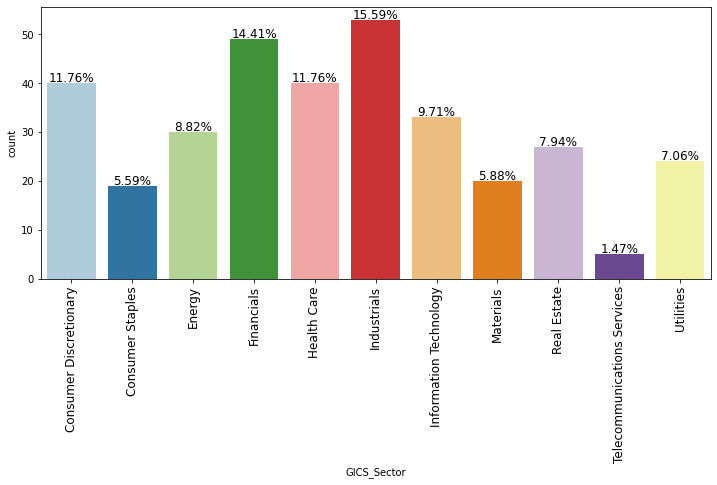

In [31]:
# Display a labeled_barplot for the category column 'GICS Sector'
labeled_barplot(Stock_Data,'GICS_Sector',perc=True)

#### Observations:
* The field GICS Sector signifies the 11 economic sectors.
* There are 15.59% of observations with GICS Sector Industrials, followed by Financials with 14.41%.

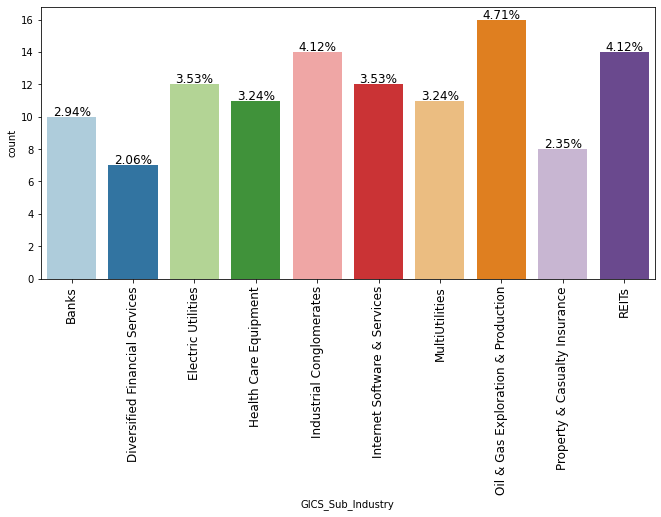

In [32]:
# Display a labeled_barplot for the category column 'GICS Sub Industry'
labeled_barplot(Stock_Data,"GICS_Sub_Industry",perc=True,n=10)

#### Observations:
* The field GICS Sub Industry signifies the 140 economic sub-sectors.
* There are 4.71% of observations with 'Oil & Gas Exploration & Production', followed by 'REITs' and 'Industrial Conglomerates' with 4.12%.

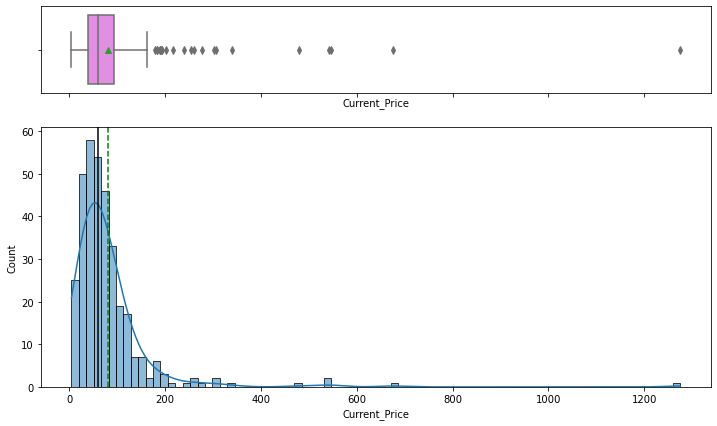

In [33]:
# Display a histogram boxplot for the numeric column 'Current Price'
histogram_boxplot(Stock_Data,'Current_Price',kde=True)

#### Observations:
* There are plenty of outliers in the data as displayed in box plot.
* The mean is greater than median, that indicates the distribution is heavily skewed to the right.
* About 68% of the values for 'Current_Price' are from 38 to 92 dollars.

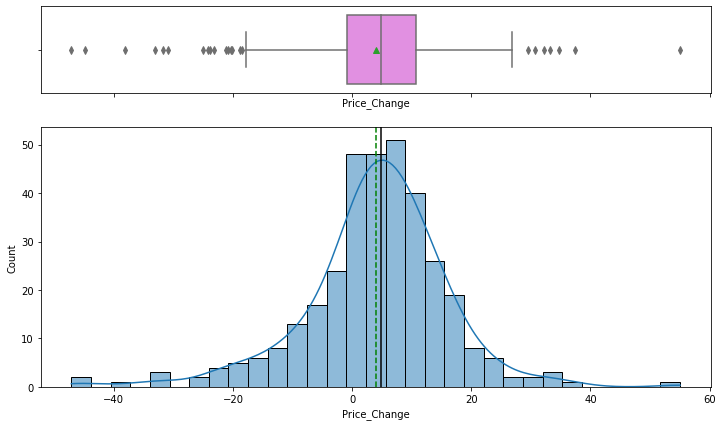

In [34]:
# Display a histogram boxplot for the numeric column 'Price Change'
histogram_boxplot(Stock_Data,'Price_Change',kde=True)

#### Observations:
* There are plenty of outliers in the data as displayed in box plot.
* The mean is slightly less than median, that indicates the distribution is marginally skewed to the right.
* About 68% of the values for 'Price_Change' are from -1 to 11 dollars.

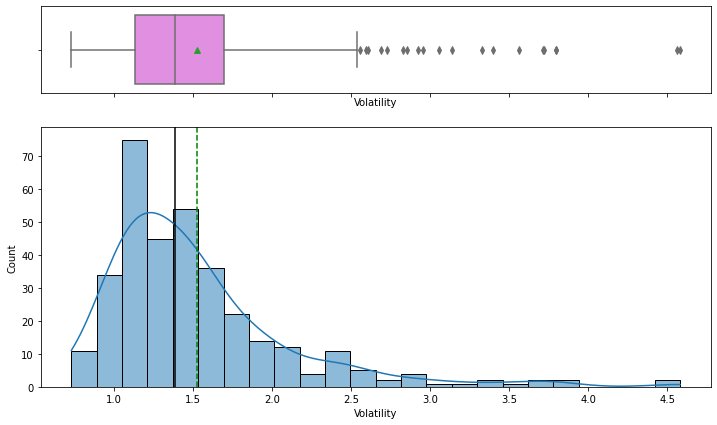

In [35]:
# Display a histogram boxplot for the numeric column 'Volatility'
histogram_boxplot(Stock_Data,'Volatility',kde=True)

#### Observations:
* There are plenty of outliers in the data as displayed in box plot.
* The mean is greater than median, that indicates the distribution is skewed to the right.
* About 68% of the values for 'Volatility' are from 1 to 1.7 dollars.

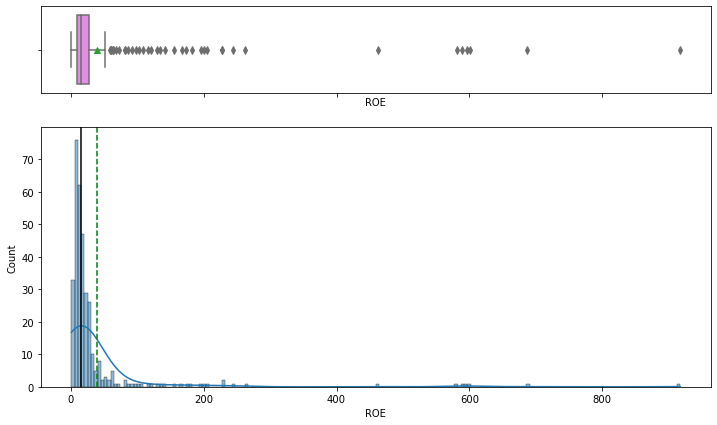

In [36]:
# Display a histogram boxplot for the numeric column 'ROE'
histogram_boxplot(Stock_Data,'ROE',kde=True)

#### Observations:
* There are plenty of outliers in the data as displayed in box plot.
* The mean is greater than median, that indicates the distribution is heavily skewed to the right.
* About 68% of the values for 'ROE' are from 9 to 27.

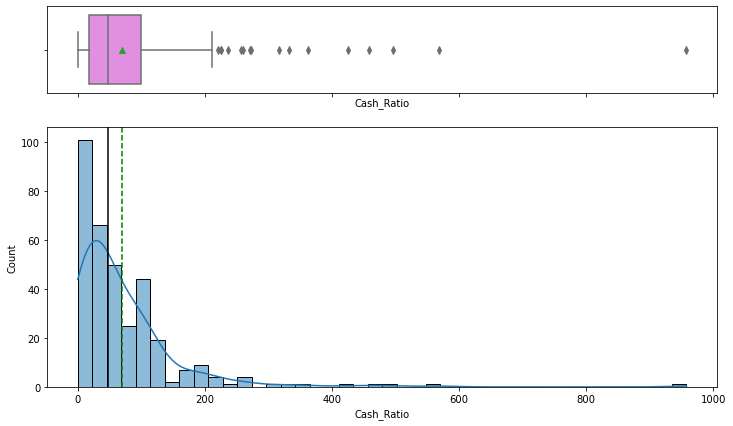

In [37]:
# Display a histogram boxplot for the numeric column 'Cash Ratio'
histogram_boxplot(Stock_Data,'Cash_Ratio',kde=True)

#### Observations:
* There are plenty of outliers in the data as displayed in box plot.
* The mean is greater than median, that indicates the distribution is heavily skewed to the right.
* About 68% of the values for 'Cash_Ratio' are from 18 to 99.

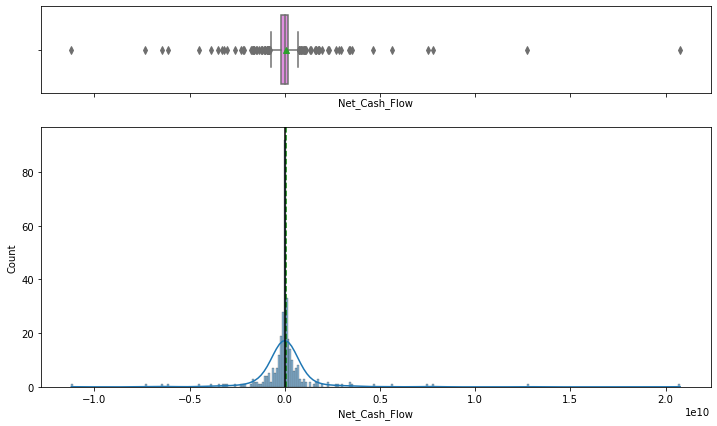

In [38]:
# Display a histogram boxplot for the numeric column 'Net Cash Flow'
histogram_boxplot(Stock_Data,'Net_Cash_Flow',kde=True)

#### Observations:
* There are plenty of outliers in the data as displayed in box plot.
* The mean is almost equal than median, that indicates the distribution is not skewed.
* About 68% of the values for 'Net_Cash_Flow' are from -193M to +169M dollars.|

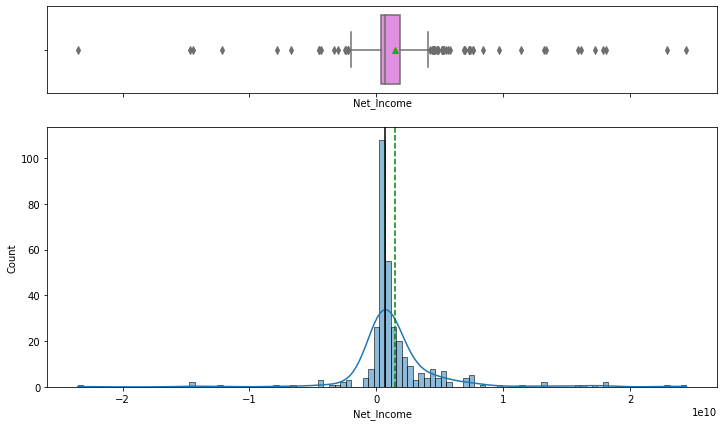

In [39]:
# Display a histogram boxplot for the numeric column 'Net Income'
histogram_boxplot(Stock_Data,'Net_Income',kde=True)

#### Observations:
* There are plenty of outliers in the data as displayed in box plot.
* The mean is slightly greater than median, that indicates the distribution is marginally skewed to the right.
* About 68% of the values for 'Net_Income' are from 352M to 1899M dollars.

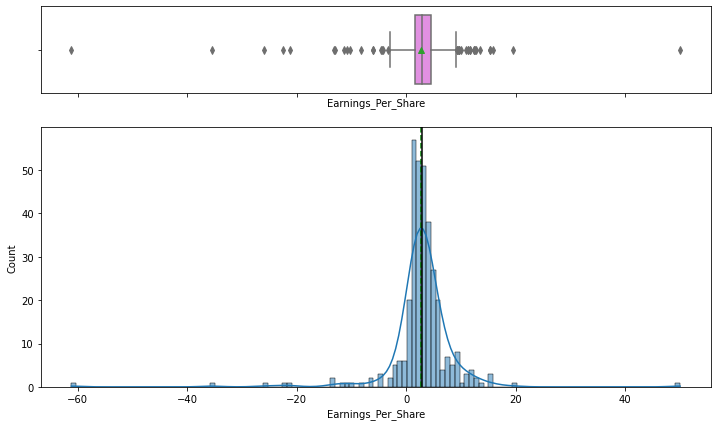

In [40]:
# Display a histogram boxplot for the numeric column 'Earnings Per Share'
histogram_boxplot(Stock_Data,'Earnings_Per_Share',kde=True)

#### Observations:
* There are plenty of outliers in the data as displayed in box plot.
* The mean is equal to median, that indicates the distribution is not skewed.
* About 68% of the values for 'Earnings_Per_Share' are from 1.5 to 4.7 dollars.

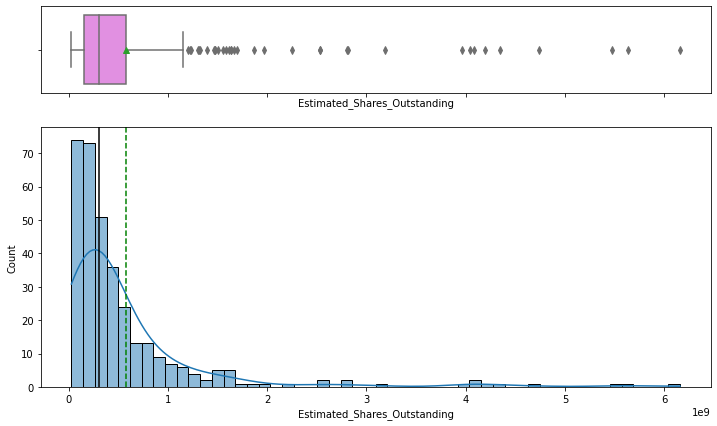

In [41]:
# Display a histogram boxplot for the numeric column 'Estimated Shares Outstanding'
histogram_boxplot(Stock_Data,'Estimated_Shares_Outstanding',kde=True)

#### Observations:
* There are plenty of outliers in the data as displayed in box plot.
* The mean is greater than median, that indicates the distribution is heavily skewed to the right.
* About 68% of the values for 'Estimated_Shares_Outstanding' are from 158M to 573M dollars.

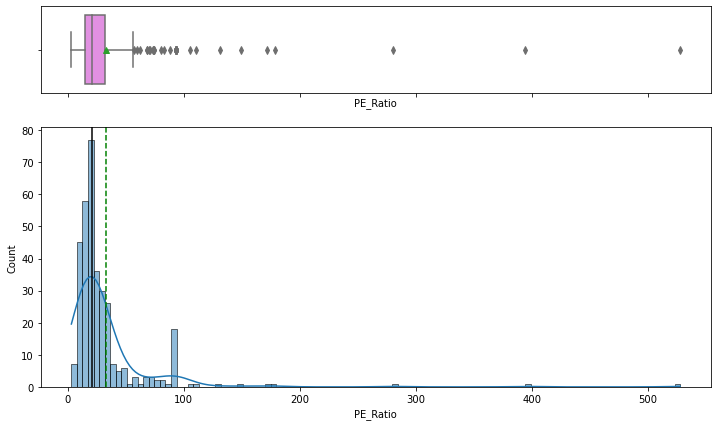

In [42]:
# Display a histogram boxplot for the numeric column 'P/E Ratio'
histogram_boxplot(Stock_Data,'PE_Ratio',kde=True)

#### Observations:
* There are plenty of outliers in the data as displayed in box plot.
* The mean is greater than median, that indicates the distribution is heavily skewed to the right.
* About 68% of the values for 'PE_Ratio' are from 15 to 32.

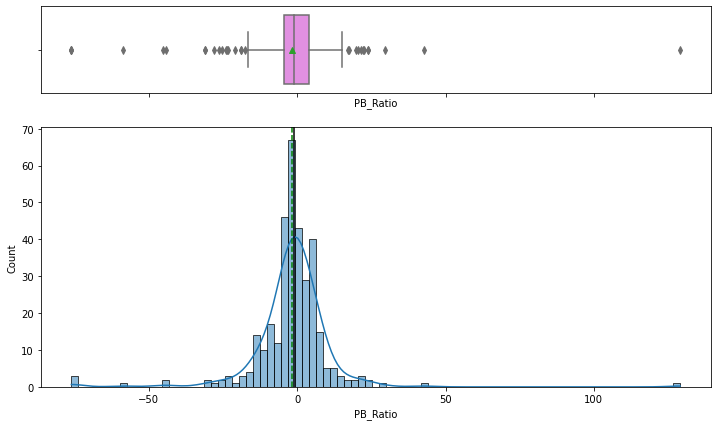

In [43]:
# Display a histogram boxplot for the numeric column 'P/B Ratio'
histogram_boxplot(Stock_Data,'PB_Ratio',kde=True)

#### Observations:
* There are plenty of outliers in the data as displayed in box plot.
* The mean is almost equal to median, that indicates the distribution is not skewed.
* About 68% of the values for 'PB_Ratio' are from -4 to +4.

### Bivariate and Multivariate Analysis
#### Starting with pairplot and heat map of numerical fields

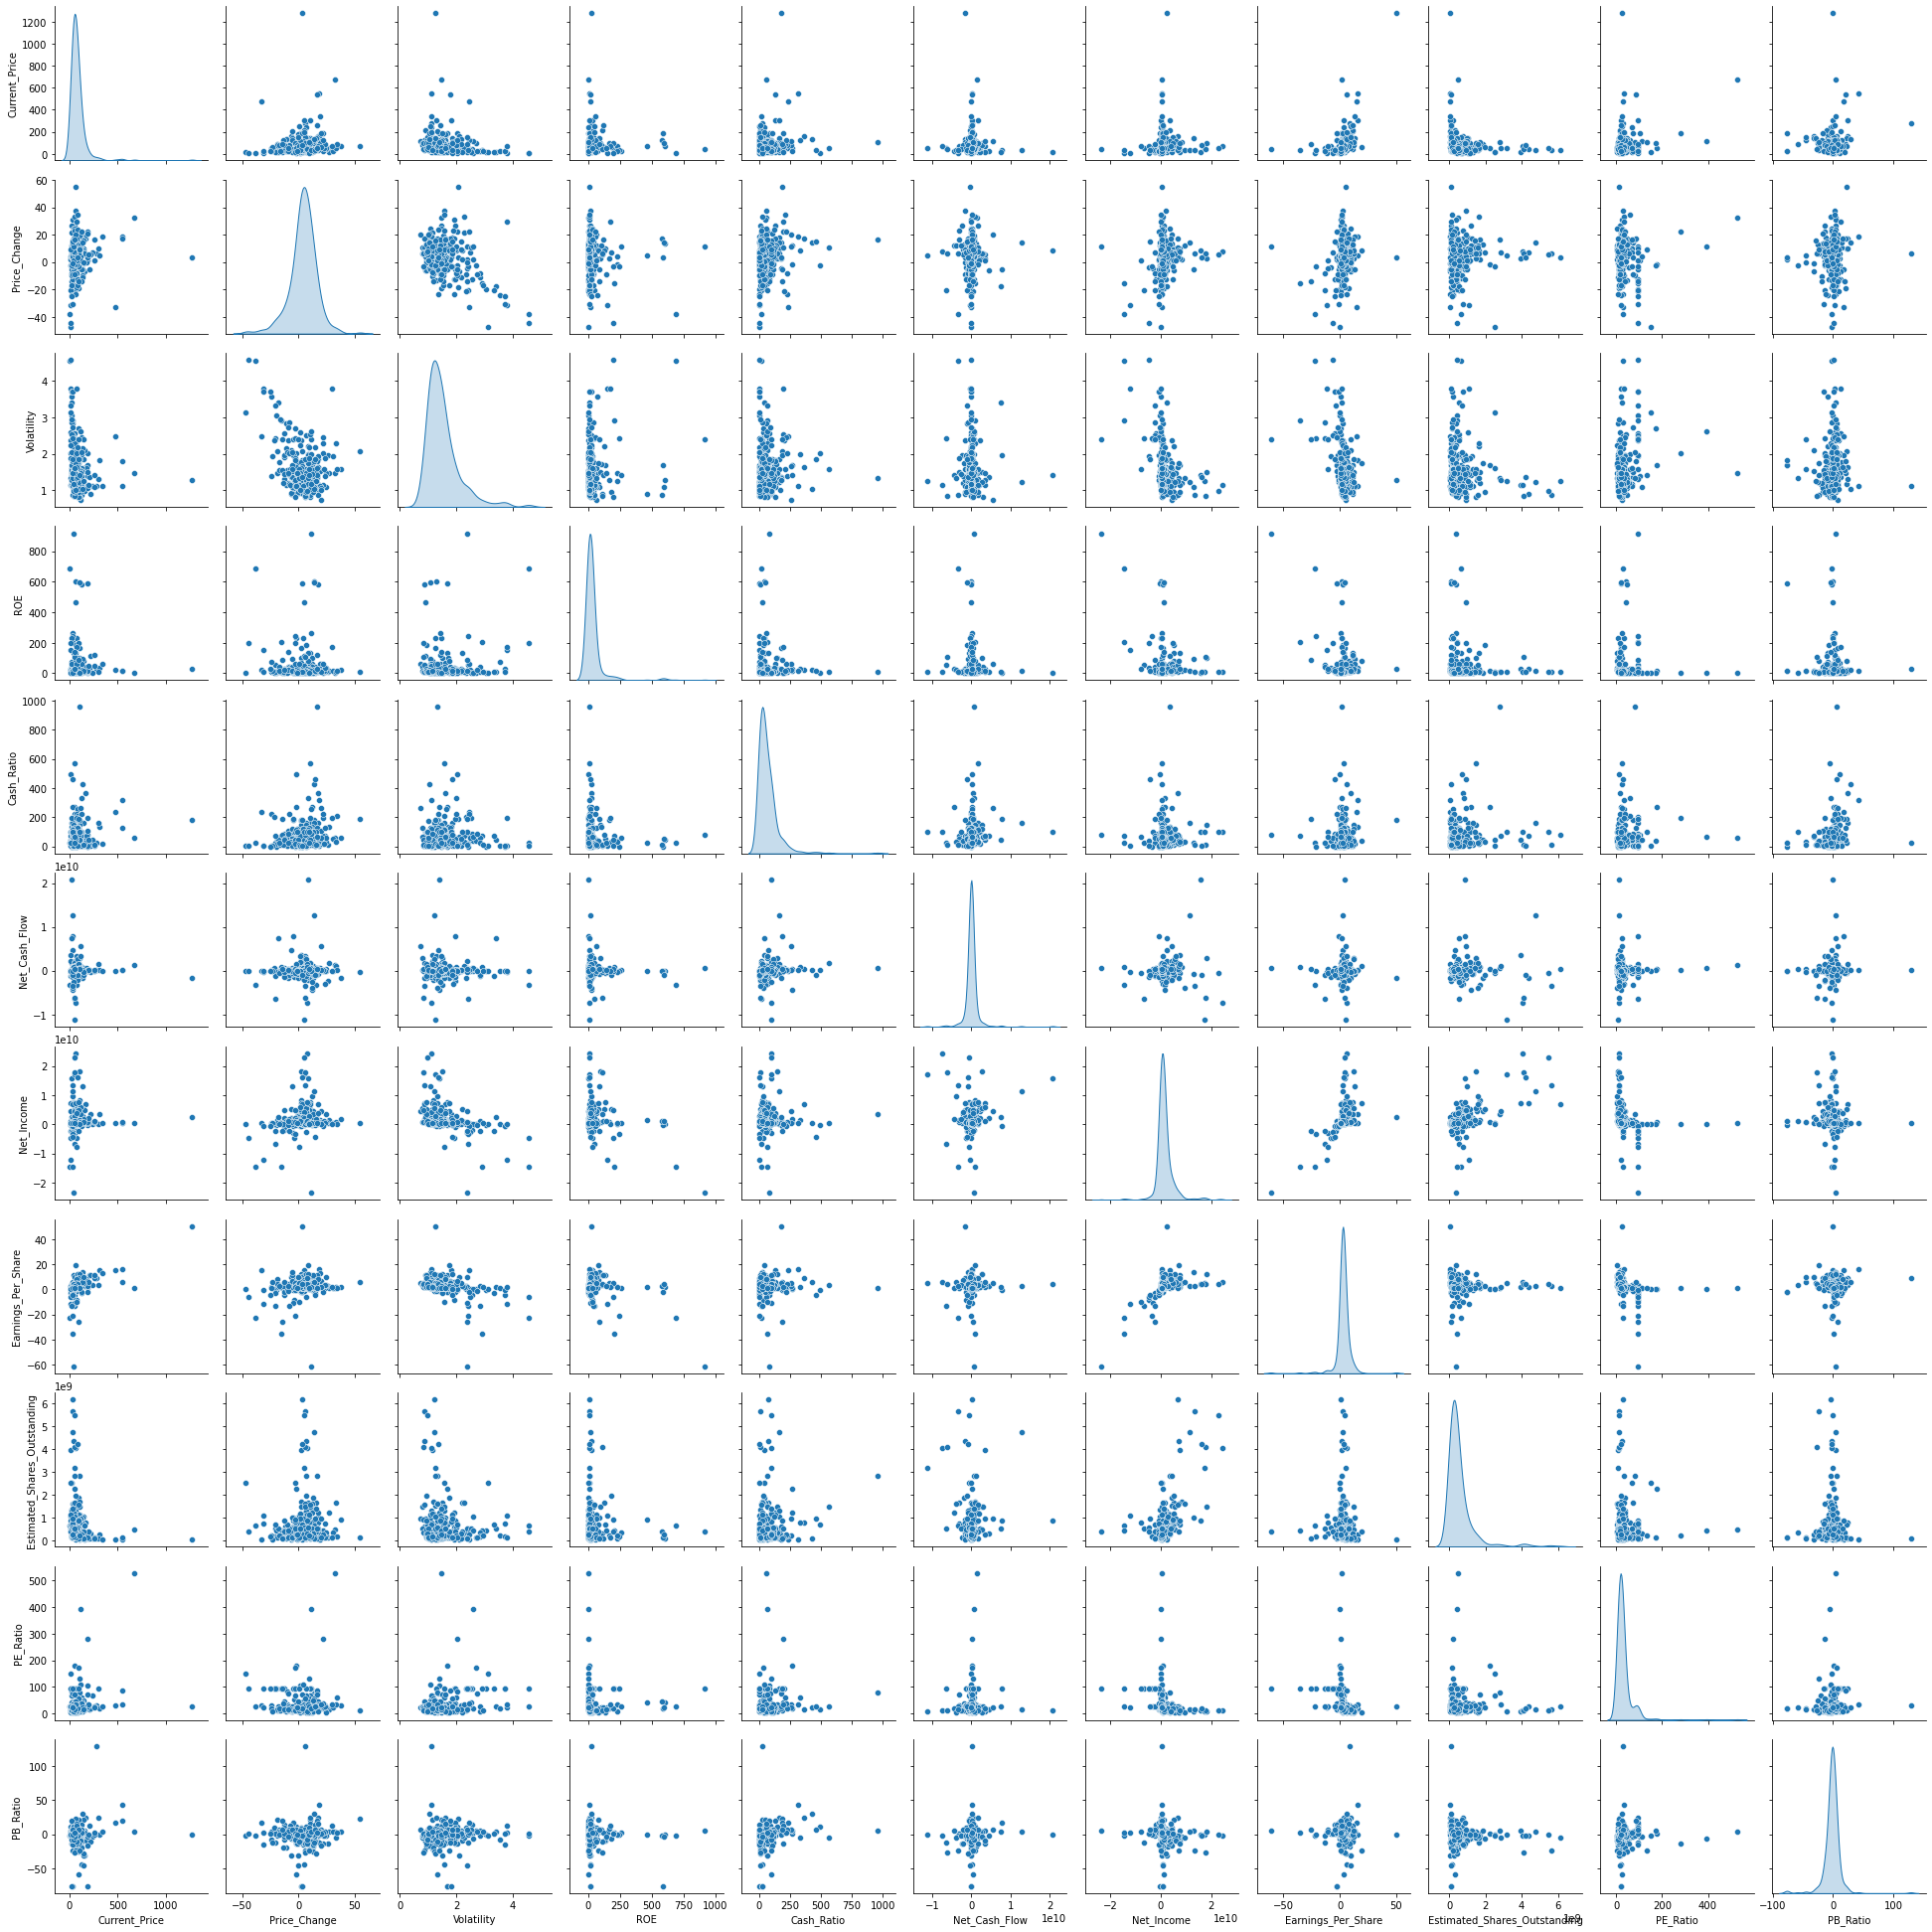

In [44]:
# Display a pair plot to find the relationship between numerical fields.
sns.pairplot(Stock_Data[numeric_cols], diag_kind="kde")
plt.show()

#### Observations:
* From a bird's eye view, there seems to have no linear correlation between the numerical fields.

In [45]:
# Print the correlation between numerical columns.
Stock_Data.corr().round(3)

Current_Price  Price_Change  Volatility    ROE  \
Current_Price                         1.000         0.135      -0.124 -0.001   
Price_Change                          0.135         1.000      -0.408 -0.043   
Volatility                           -0.124        -0.408       1.000  0.163   
ROE                                  -0.001        -0.043       0.163  1.000   
Cash_Ratio                            0.128         0.169       0.021 -0.069   
Net_Cash_Flow                        -0.022         0.027      -0.014 -0.052   
Net_Income                            0.037         0.179      -0.383 -0.289   
Earnings_Per_Share                    0.480         0.175      -0.379 -0.405   
Estimated_Shares_Outstanding         -0.145         0.034      -0.096 -0.030   
PE_Ratio                              0.260        -0.002       0.264  0.023   
PB_Ratio                              0.125         0.034       0.047 -0.063   

                              Cash_Ratio  Net_Cash_Flow  Net_Income  \
Current_Price                      0.128         -0.022       0.037   
Price_Change                       0.169          0.027       0.179   
Volatility                         0.021         -0.014      -0.383   
ROE                               -0.069         -0.052      -0.289   
Cash_Ratio                         1.000          0.114       0.029   
Net_Cash_Flow                      0.114          1.000       0.044   
Net_Income                         0.029          0.044       1.000   
Earnings_Per_Share                 0.025          0.019       0.558   
Estimated_Shares_Outstanding       0.136         -0.051       0.589   
PE_Ratio                           0.089          0.027      -0.224   
PB_Ratio                           0.230          0.057      -0.062   

                              Earnings_Per_Share  \
Current_Price                              0.480   
Price_Change                               0.175   
Volatility                                -0.379   
ROE                                       -0.405   
Cash_Ratio                                 0.025   
Net_Cash_Flow                              0.019   
Net_Income                                 0.558   
Earnings_Per_Share                         1.000   
Estimated_Shares_Outstanding              -0.027   
PE_Ratio                                  -0.261   
PB_Ratio                                   0.015   

                              Estimated_Shares_Outstanding  PE_Ratio  PB_Ratio  
Current_Price                                       -0.145     0.260     0.125  
Price_Change                                         0.034    -0.002     0.034  
Volatility                                          -0.096     0.264     0.047  
ROE                                                 -0.030     0.023    -0.063  
Cash_Ratio                                           0.136     0.089     0.230  
Net_Cash_Flow                                       -0.051     0.027     0.057  
Net_Income                                           0.589    -0.224    -0.062  
Earnings_Per_Share                                  -0.027    -0.261     0.015  
Estimated_Shares_Outstanding                         1.000    -0.015    -0.028  
PE_Ratio                                            -0.015     1.000     0.036  
PB_Ratio                                            -0.028     0.036     1.000

#### Observations:
* Let's plot the  correlation between the numerical fields in a heat map.

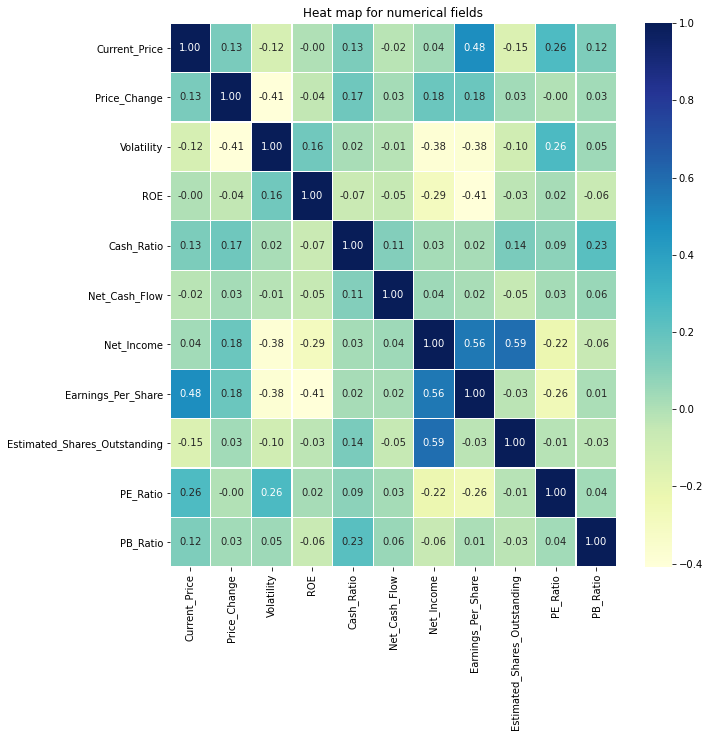

In [46]:
# Set the figure size and title for the plot
plt.figure(figsize=(10,10))
plt.title('Heat map for numerical fields')

# Display a heat map to find the relationship between numerical fields.
sns.heatmap(Stock_Data.corr(),annot=True,linewidths=0.2,fmt=".2f",cmap="YlGnBu")
plt.show()

#### Observations (as per the heatmap):
* The Net_Income field is correlated to Earnings_per_Share field (0.56) and Estimated_Shares_Outstanding field (0.59).
* The Earnings_per_Share field is correlated to Current Price field (0.48), Volatility field (-0.38) and ROE (-0.41)
* The Volatility field is correlated to Price_Change field (-0.41) and Net_Income field (-0.38).
* There seems to be very low correlation between the other numerical fields as seen in the above heatmap.

### Bivariate analysis

In [47]:
# function to plot a table and a barplot along the same scale.
def barplot_table(feature):
    """
    Barplot and Datatable

    feature: dataframe column
    """
    modified_col = 'Average '+feature
    # Grouping the data by "GCIS Sector", aggregating for average of records and renaming columns.
    Stock_Data_fn = Stock_Data.groupby(by=['GICS_Sector']
                                    ).agg(
                                        {feature:'mean'}
                                    ).reset_index(
                                    ).rename(
                                        columns={feature:modified_col}
                                    )
    # print all records for the mean of feature
    print('All Records')
    print(Stock_Data_fn.sort_values(by=modified_col).round(2))
    print('--'*40)

    # Bar plot for number of GICS Sector vs modified_col
    plt.figure(figsize=(10,5))
    sns.barplot(x="GICS_Sector",y=modified_col,data=Stock_Data_fn,palette="muted")
    plt.xticks(rotation=90, fontsize=12)
    plt.show()

# for col in numeric_cols:
#     print("# Bar plot for number of GICS Sector vs Average '{0}'".format(col))
#     print("barplot_table('{0}')".format(col))
#     print("-" * 40)

All Records
                    GICS_Sector  Average Current_Price
9   Telecommunications Services                  32.96
2                        Energy                  46.04
10                    Utilities                  52.97
3                    Financials                  58.66
6        Information Technology                  63.55
1              Consumer Staples                  71.97
5                   Industrials                  74.41
7                     Materials                  76.55
8                   Real Estate                  90.98
0        Consumer Discretionary                 128.10
4                   Health Care                 132.05
--------------------------------------------------------------------------------


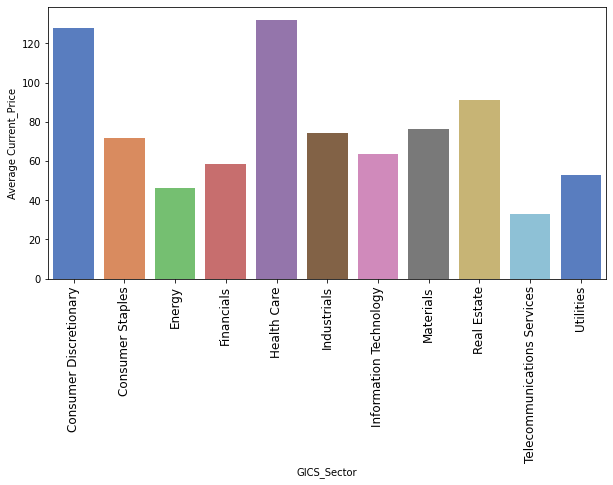

In [48]:
# Bar plot for number of GICS Sector vs Average Current_Price
barplot_table('Current_Price')

#### Observations:
* The mean price of stocks is not the same for all economic sectors.
* The mean stock price is high for 'Health Care' and lowest for 'Telecommunication Services'.

All Records
                    GICS_Sector  Average Price_Change
2                        Energy                -10.23
10                    Utilities                  0.80
5                   Industrials                  2.83
3                    Financials                  3.87
7                     Materials                  5.59
0        Consumer Discretionary                  5.85
8                   Real Estate                  6.21
9   Telecommunications Services                  6.96
6        Information Technology                  7.22
1              Consumer Staples                  8.68
4                   Health Care                  9.59
--------------------------------------------------------------------------------


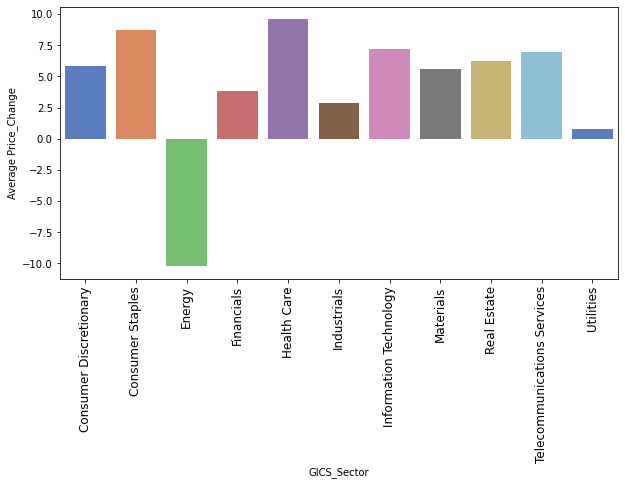

In [49]:
# Bar plot for number of GICS Sector vs Average 'Price_Change'
barplot_table('Price_Change')

#### Observations:
* The price change for stocks for the last 13 weeks is not the same for all economic sectors.
* The mean positive price change is high for 'Health Care' and lowest for 'Utilities'.
* The mean price change for 'Energy' sector is negative indicating that the stock prices for Energy companies are consistently going down.

All Records
                    GICS_Sector  Average Volatility
10                    Utilities                1.12
1              Consumer Staples                1.15
8                   Real Estate                1.21
3                    Financials                1.27
9   Telecommunications Services                1.34
5                   Industrials                1.42
4                   Health Care                1.54
0        Consumer Discretionary                1.60
6        Information Technology                1.66
7                     Materials                1.82
2                        Energy                2.57
--------------------------------------------------------------------------------


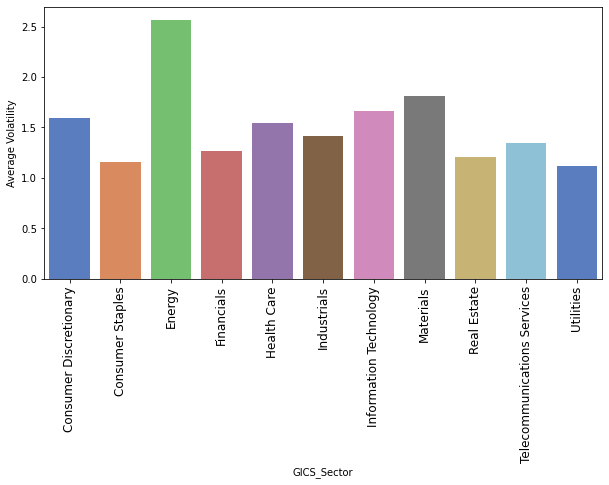

In [50]:
# Bar plot for number of GICS Sector vs Average 'Volatility'
barplot_table('Volatility')

#### Observations:
* The mean volatility of stocks is not the same for all economic sectors.
* The mean volatility is high for 'Energy' and lowest for 'Utilities' and 'Consumer Staples'.

All Records
                    GICS_Sector  Average ROE
10                    Utilities         9.88
8                   Real Estate        12.44
6        Information Technology        21.79
3                    Financials        26.29
4                   Health Care        27.78
9   Telecommunications Services        32.60
7                     Materials        33.00
0        Consumer Discretionary        44.90
5                   Industrials        50.15
1              Consumer Staples        89.42
2                        Energy        93.20
--------------------------------------------------------------------------------


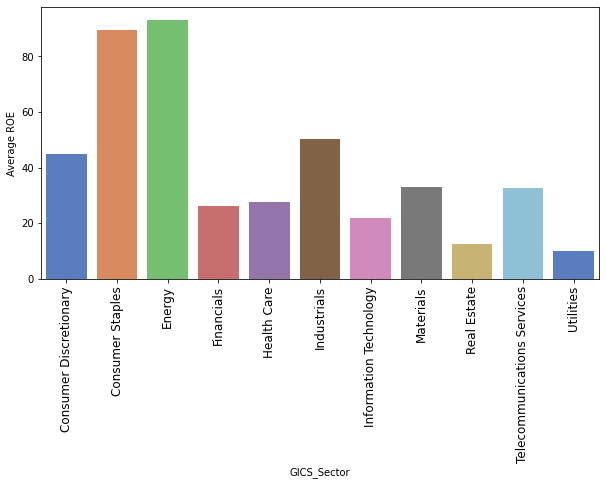

In [51]:
# Bar plot for number of GICS Sector vs Average 'ROE'
barplot_table('ROE')

#### Observations:
* The mean ROE for stocks is not the same for all economic sectors.
* The mean ROE is high for 'Energy' sector closely followed by 'Consumer Staples' sector.

All Records
                    GICS_Sector  Average Cash_Ratio
10                    Utilities               13.62
5                   Industrials               36.19
7                     Materials               41.70
0        Consumer Discretionary               49.58
8                   Real Estate               50.11
2                        Energy               51.13
1              Consumer Staples               70.95
3                    Financials               98.59
4                   Health Care              103.78
9   Telecommunications Services              117.00
6        Information Technology              149.82
--------------------------------------------------------------------------------


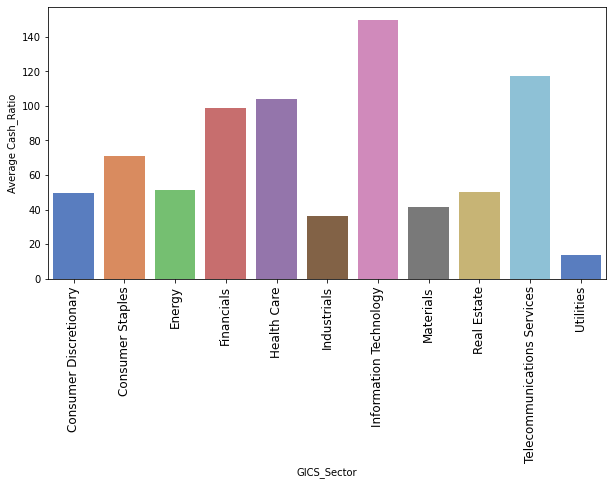

In [52]:
# Bar plot for number of GICS Sector vs Average 'Cash_Ratio'
barplot_table('Cash_Ratio')

#### Observations:
* The mean Cash Ratio for stocks is not the same for all economic sectors.
* The mean Cash_Ratio is high for 'Information Technology' and lowest for 'Utilities'.

All Records
                    GICS_Sector  Average Net_Cash_Flow
9   Telecommunications Services          -1.816800e+09
2                        Energy          -3.083182e+08
7                     Materials          -2.912368e+08
5                   Industrials          -1.601032e+08
8                   Real Estate           3.546704e+06
0        Consumer Discretionary           8.421318e+07
10                    Utilities           1.764623e+08
3                    Financials           2.543563e+08
1              Consumer Staples           2.586272e+08
4                   Health Care           2.626878e+08
6        Information Technology           4.830991e+08
--------------------------------------------------------------------------------


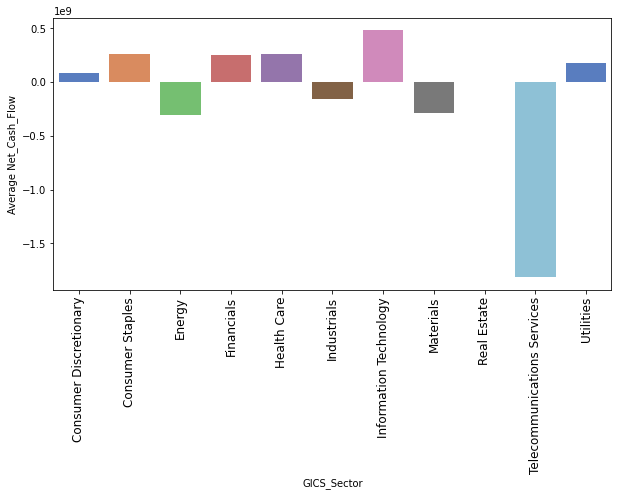

In [53]:
# Bar plot for number of GICS Sector vs Average 'Net_Cash_Flow'
barplot_table('Net_Cash_Flow')

#### Observations:
* The mean Net Cash Flow of companies is not the same for all economic sectors.
* The mean Net Cash Flow is high for 'Information Technology' and lowest for 'Telecommunication Services'.

All Records
                    GICS_Sector  Average Net_Income
2                        Energy       -2.087527e+09
7                     Materials        2.785165e+08
8                   Real Estate        5.677757e+08
10                    Utilities        1.107146e+09
0        Consumer Discretionary        1.373450e+09
6        Information Technology        1.701587e+09
5                   Industrials        1.722373e+09
4                   Health Care        2.018515e+09
1              Consumer Staples        2.518833e+09
3                    Financials        3.202678e+09
9   Telecommunications Services        7.067800e+09
--------------------------------------------------------------------------------


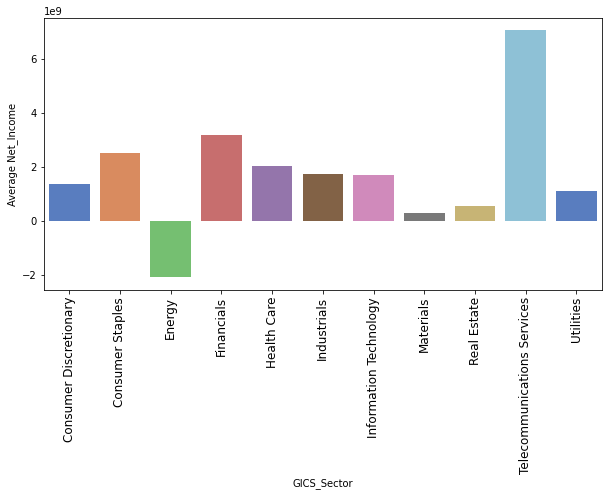

In [54]:
# Bar plot for number of GICS Sector vs Average 'Net_Income'
barplot_table('Net_Income')

#### Observations:
* As expected, the Net Income for 'Energy' sector is the lowest.
* The mean Net Income is high for 'Telecommunication Services', followed by 'Financials'.

All Records
                    GICS_Sector  Average Earnings_Per_Share
2                        Energy                       -6.91
6        Information Technology                        2.27
8                   Real Estate                        2.34
10                    Utilities                        2.75
7                     Materials                        3.13
1              Consumer Staples                        3.22
9   Telecommunications Services                        3.55
3                    Financials                        4.22
5                   Industrials                        4.46
0        Consumer Discretionary                        4.53
4                   Health Care                        4.54
--------------------------------------------------------------------------------


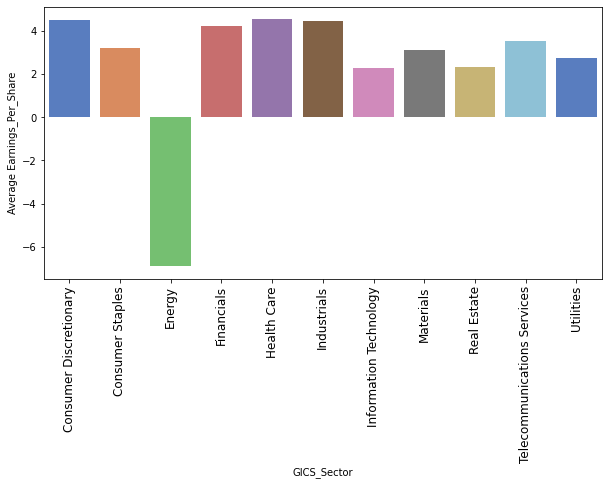

In [55]:
# Bar plot for number of GICS Sector vs Average 'Earnings_Per_Share'
barplot_table('Earnings_Per_Share')

#### Observations:
* As expected, the 'Earnings per Share' for 'Energy' sector is the lowest.
* The mean 'Earnings per Share' is high for ' Health Care', closely followed by 'Consumer Discretionary' and 'Industrials'.

All Records
                    GICS_Sector  Average Estimated_Shares_Outstanding
7                     Materials                          3.085246e+08
8                   Real Estate                          3.444540e+08
5                   Industrials                          3.547169e+08
10                    Utilities                          3.809193e+08
0        Consumer Discretionary                          3.996513e+08
2                        Energy                          6.635288e+08
3                    Financials                          6.838773e+08
4                   Health Care                          6.845955e+08
6        Information Technology                          8.282789e+08
1              Consumer Staples                          9.136852e+08
9   Telecommunications Services                          2.259575e+09
--------------------------------------------------------------------------------


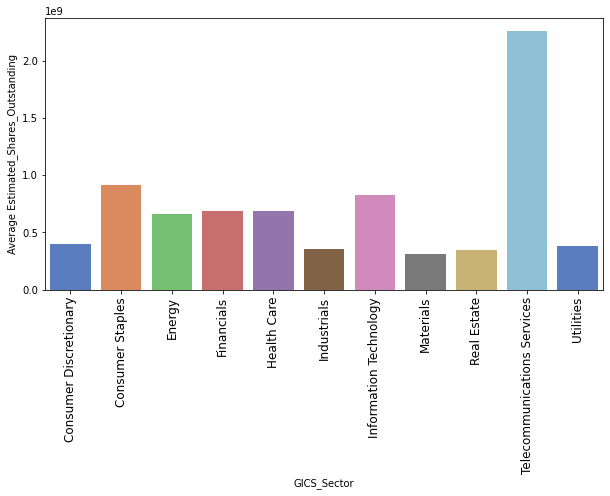

In [56]:
# Bar plot for number of GICS Sector vs Average 'Estimated_Shares_Outstanding'
barplot_table('Estimated_Shares_Outstanding')

#### Observations:
* The mean price of stocks is not the same for all economic sectors.
* The mean stock price is high for 'Telecommunication Services' and lowest for 'Materials'.

All Records
                    GICS_Sector  Average PE_Ratio
9   Telecommunications Services             12.22
3                    Financials             16.02
5                   Industrials             18.26
10                    Utilities             18.72
7                     Materials             24.59
1              Consumer Staples             25.52
0        Consumer Discretionary             35.21
4                   Health Care             41.14
8                   Real Estate             43.07
6        Information Technology             43.78
2                        Energy             72.90
--------------------------------------------------------------------------------


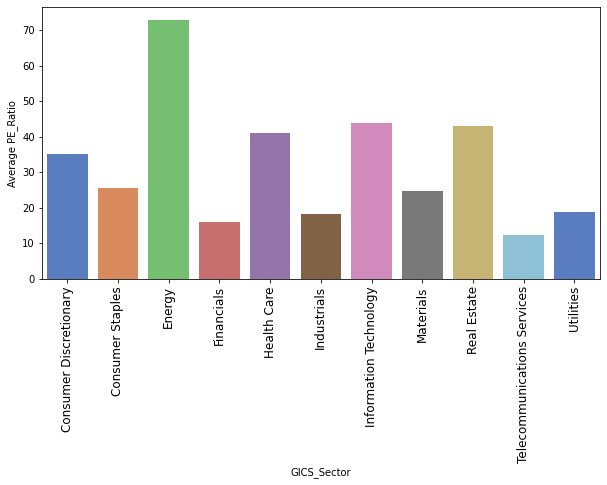

In [57]:
# Bar plot for number of GICS Sector vs Average 'PE_Ratio'
barplot_table('PE_Ratio')

#### Observations:
* The mean P/E Ratio of stocks is not the same for all economic sectors.
* The mean P/E Ratio is high for 'Energy' and lowest for 'Telecommunication Services'.

All Records
                    GICS_Sector  Average PB_Ratio
9   Telecommunications Services            -11.01
0        Consumer Discretionary             -8.25
1              Consumer Staples             -4.55
3                    Financials             -4.27
10                    Utilities             -3.09
8                   Real Estate             -3.00
5                   Industrials             -0.98
4                   Health Care              0.07
7                     Materials              0.72
2                        Energy              2.54
6        Information Technology              6.38
--------------------------------------------------------------------------------


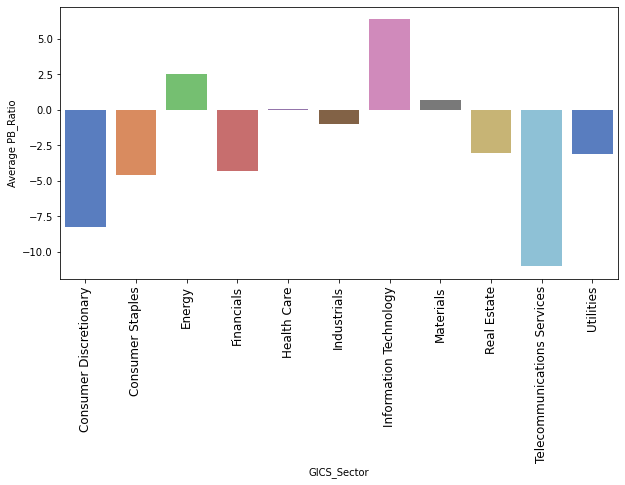

In [58]:
# Bar plot for number of GICS Sector vs Average 'PB_Ratio'
barplot_table('PB_Ratio')

#### Observations:
* The mean P/B Ratio of stocks is not the same for all economic sectors.
* The mean P/B Ratio is high for 'Information Technology' and lowest for 'Telecommunication Services' (negative).
* The Ratio of the company's stock price per share by its book value per share (P/B Ratio) is negaive for 7 economic sectors out of 11.

### Multivariate analysis

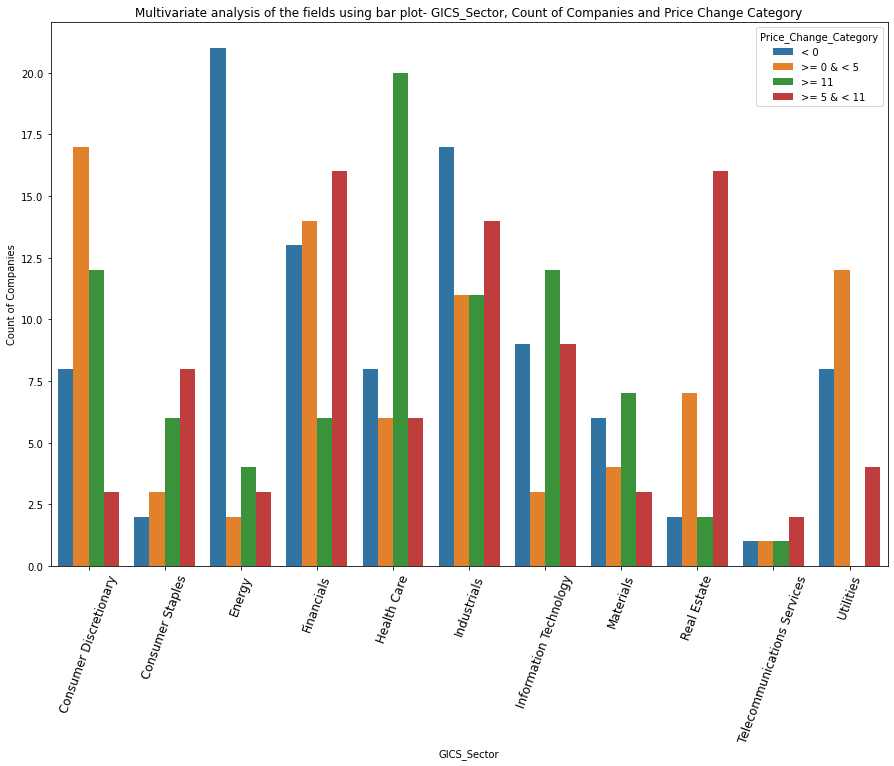

In [59]:
# Grouping the data by "GCIS Sector" and "Price Change Category", aggregating for average of records and renaming columns.
Stock_Data_Price_Change_Category = Stock_Data.groupby(by=['GICS_Sector','Price_Change_Category']
                                ).agg(
                                    {'Current_Price':'count'}
                                ).reset_index(
                                ).rename(
                                    columns={'Current_Price':'Count of Companies'}
                                )

# Set the figure size and title for the plot
plt.figure(figsize=(15, 10))
plt.title('Multivariate analysis of the fields using bar plot- GICS_Sector, Count of Companies and Price Change Category')
plt.xticks(rotation=70, fontsize=12)

# Bar plot for analying the fields - GICS Sector, Count of Companies and Price Change Categories.
sns.barplot(x="GICS_Sector", y="Count of Companies",hue="Price_Change_Category",data=Stock_Data_Price_Change_Category)
plt.show()

#### Observations:
* More than 20 compaines under Energy sector has reported a negative price change (loss).
* 20 compaines under Healthcare sector has reported a high price change (>= 11) for the past 13 weeks.
* 16 organizations under Financials and Real Estate sector has reported a medium-to-high price change (>= 5 and < 11) for the past 13 weeks.

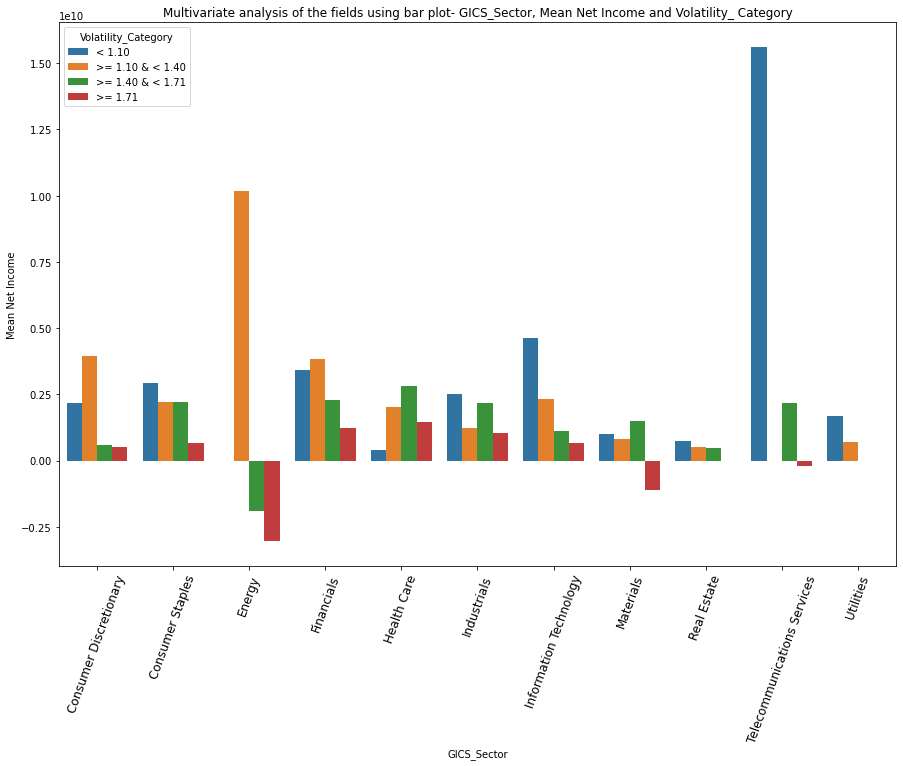

In [60]:
# Grouping the data by "GCIS Sector" and "Price Change Category", aggregating for average of records and renaming columns.
Stock_Data_Volatility_Category = Stock_Data.groupby(by=['GICS_Sector','Volatility_Category']
                                ).agg(
                                    {'Net_Income':'mean'}
                                ).reset_index(
                                ).rename(
                                    columns={'Net_Income':'Mean Net Income'}
                                )

# Set the figure size and title for the plot
plt.figure(figsize=(15, 10))
plt.title('Multivariate analysis of the fields using bar plot- GICS_Sector, Mean Net Income and Volatility_ Category')
plt.xticks(rotation=70, fontsize=12)

# Bar plot for analying the fields - GICS Sector, Mean Net Income and Volatility Category.
sns.barplot(x="GICS_Sector", y="Mean Net Income",hue="Volatility_Category",data=Stock_Data_Volatility_Category)
plt.show()

#### Observations:
* High Volatility (>1.71) is reported in Energy sector by companies with negative net income less than -25M.
* Low Volatility (<1.10) is reported in Telecommunications Services sector by companies with positive net income more than 1.5T.

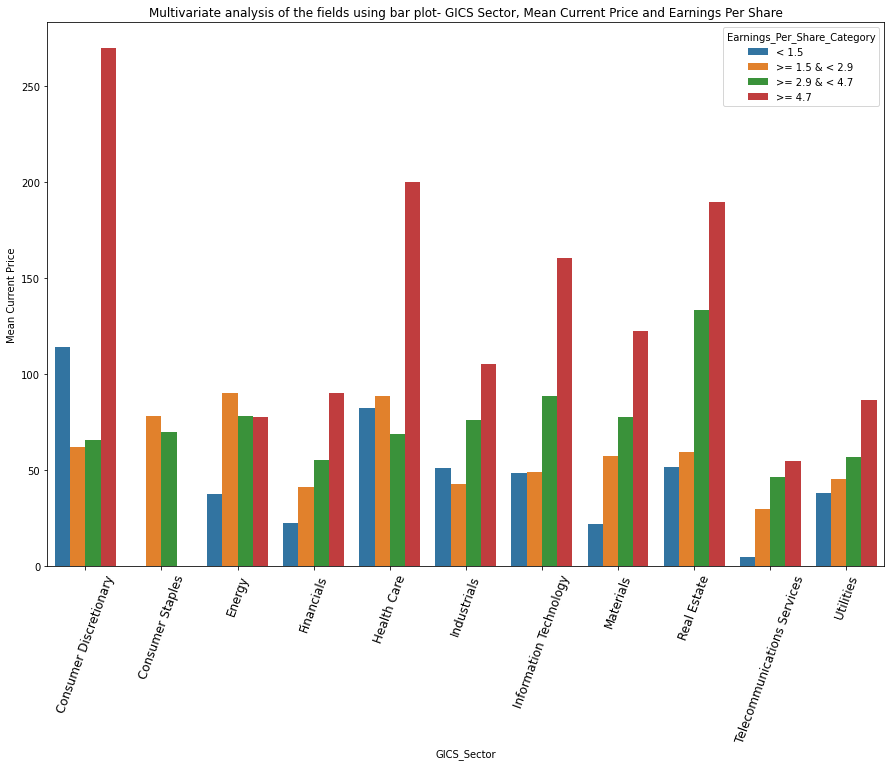

In [61]:
# Grouping the data by "GCIS Sector" and "Price Change Category", aggregating for average of records and renaming columns.
Stock_Data_Earnings_Per_Share_Category = Stock_Data.groupby(by=['GICS_Sector','Earnings_Per_Share_Category']
                                ).agg(
                                    {'Current_Price':'mean'}
                                ).reset_index(
                                ).rename(
                                    columns={'Current_Price':'Mean Current Price'}
                                )

# Set the figure size and title for the plot
plt.figure(figsize=(15, 10))
plt.title('Multivariate analysis of the fields using bar plot- GICS Sector, Mean Current Price and Earnings Per Share')
plt.xticks(rotation=70, fontsize=12)

# Bar plot for analying the fields - GICS Sector, Count of Companies and Volatility Category.
sns.barplot(x="GICS_Sector", y="Mean Current Price",hue="Earnings_Per_Share_Category",data=Stock_Data_Earnings_Per_Share_Category)
plt.show()

#### Observations:
* With in the 'Consumer Discretionary', 'Information Technology', 'Health Care' and 'Real Estate' sectors, the shares with current value more than 150 dollars have high earnings per share (>4.7).
* For 'Telecommunications Services', the shares with low earnings per share have the mean price less than 10 dollars. This could have contributed to the steady performance of 'Telecommunications Services' sector.

## <a name='link2'>**3. Questions on Exploratory Data Analysis(EDA)**</a>
### Leading Questions

#### 1. What does the distribution of stock prices look like?

In [62]:
Stock_Data['Current_Price'].describe()

count     340.000000
mean       80.862345
std        98.055086
min         4.500000
25%        38.555000
50%        59.705000
75%        92.880001
max      1274.949951
Name: Current_Price, dtype: float64

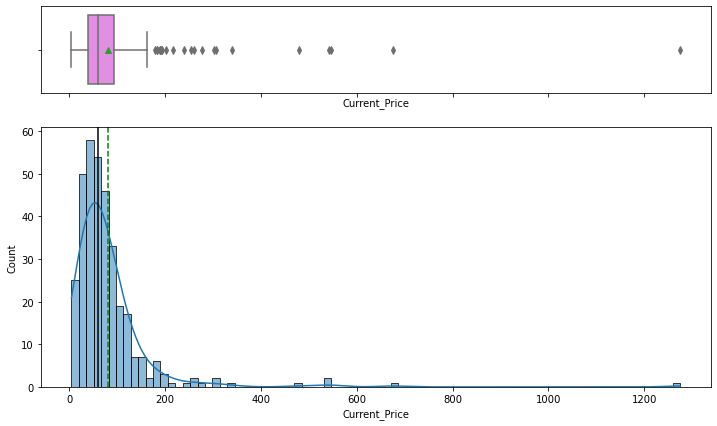

In [63]:
# Display a histogram boxplot for the numeric column 'Current Price'
histogram_boxplot(Stock_Data,'Current_Price',kde=True)

#### Observations:
* The mean of current price is 80 dollars and the median is 60 dollars. 
* The mean is greater than median, that indicates the distribution is heavily skewed to the right.
* About 68% of the stocks have the 'Current_Price' ranging from 38 to 92 dollars.
* The minumum value is 4.5 and the maximum is 1274.9 dollars. There are plenty of outliers in the data as displayed in box plot.

#### 2. The stocks of which economic sector have seen the maximum price increase on average?

In [64]:
# Grouping the data by "GICS_Sector", aggregating for sum and count of records and renaming columns.
Stock_Data_by_Industry = Stock_Data.groupby(by=['GICS_Sector']
                                ).agg(
                                    {'Current_Price':'mean', 'Price_Change': 'mean'}
                                ).reset_index(
                                ).rename(
                                    columns={'Current_Price':'Average Price','Price_Change':'Average Price Change'}
                                )
# Get the number of cases certified
Stock_Data_by_Industry.sort_values(by='Average Price Change',axis=0)

GICS_Sector  Average Price  Average Price Change
2                        Energy      46.042334            -10.228289
10                    Utilities      52.968542              0.803657
5                   Industrials      74.411807              2.833127
3                    Financials      58.659183              3.865406
7                     Materials      76.551500              5.589738
0        Consumer Discretionary     128.095404              5.846093
8                   Real Estate      90.976925              6.205548
9   Telecommunications Services      32.964000              6.956980
6        Information Technology      63.548485              7.217476
1              Consumer Staples      71.972807              8.684750
4                   Health Care     132.048250              9.585652

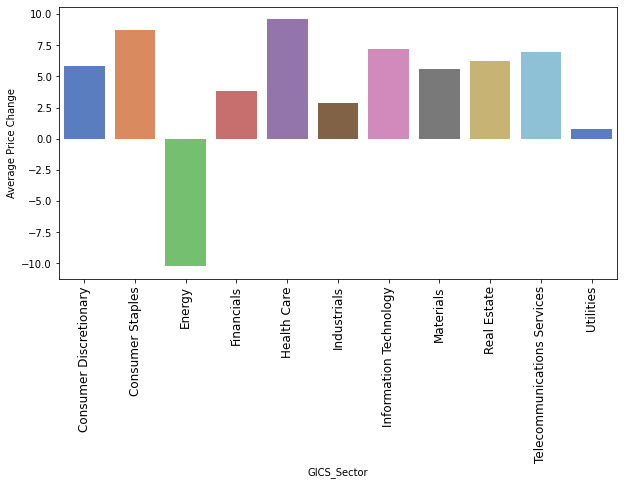

In [65]:
# Bar plot for number of GICS Sector vs modified_col
plt.figure(figsize=(10,5))
sns.barplot(x="GICS_Sector",y='Average Price Change',data=Stock_Data_by_Industry,palette="muted")
plt.xticks(rotation=90, fontsize=12)
plt.show()

#### Observations:
* **Health Care** economic sector have seen the maximum price increase on average.(+9.58 dollars)

#### 3. How are the different variables correlated with each other?

In [66]:
# Print the correlation between numerical columns.
Stock_Data.corr().round(3)

Current_Price  Price_Change  Volatility    ROE  \
Current_Price                         1.000         0.135      -0.124 -0.001   
Price_Change                          0.135         1.000      -0.408 -0.043   
Volatility                           -0.124        -0.408       1.000  0.163   
ROE                                  -0.001        -0.043       0.163  1.000   
Cash_Ratio                            0.128         0.169       0.021 -0.069   
Net_Cash_Flow                        -0.022         0.027      -0.014 -0.052   
Net_Income                            0.037         0.179      -0.383 -0.289   
Earnings_Per_Share                    0.480         0.175      -0.379 -0.405   
Estimated_Shares_Outstanding         -0.145         0.034      -0.096 -0.030   
PE_Ratio                              0.260        -0.002       0.264  0.023   
PB_Ratio                              0.125         0.034       0.047 -0.063   

                              Cash_Ratio  Net_Cash_Flow  Net_Income  \
Current_Price                      0.128         -0.022       0.037   
Price_Change                       0.169          0.027       0.179   
Volatility                         0.021         -0.014      -0.383   
ROE                               -0.069         -0.052      -0.289   
Cash_Ratio                         1.000          0.114       0.029   
Net_Cash_Flow                      0.114          1.000       0.044   
Net_Income                         0.029          0.044       1.000   
Earnings_Per_Share                 0.025          0.019       0.558   
Estimated_Shares_Outstanding       0.136         -0.051       0.589   
PE_Ratio                           0.089          0.027      -0.224   
PB_Ratio                           0.230          0.057      -0.062   

                              Earnings_Per_Share  \
Current_Price                              0.480   
Price_Change                               0.175   
Volatility                                -0.379   
ROE                                       -0.405   
Cash_Ratio                                 0.025   
Net_Cash_Flow                              0.019   
Net_Income                                 0.558   
Earnings_Per_Share                         1.000   
Estimated_Shares_Outstanding              -0.027   
PE_Ratio                                  -0.261   
PB_Ratio                                   0.015   

                              Estimated_Shares_Outstanding  PE_Ratio  PB_Ratio  
Current_Price                                       -0.145     0.260     0.125  
Price_Change                                         0.034    -0.002     0.034  
Volatility                                          -0.096     0.264     0.047  
ROE                                                 -0.030     0.023    -0.063  
Cash_Ratio                                           0.136     0.089     0.230  
Net_Cash_Flow                                       -0.051     0.027     0.057  
Net_Income                                           0.589    -0.224    -0.062  
Earnings_Per_Share                                  -0.027    -0.261     0.015  
Estimated_Shares_Outstanding                         1.000    -0.015    -0.028  
PE_Ratio                                            -0.015     1.000     0.036  
PB_Ratio                                            -0.028     0.036     1.000

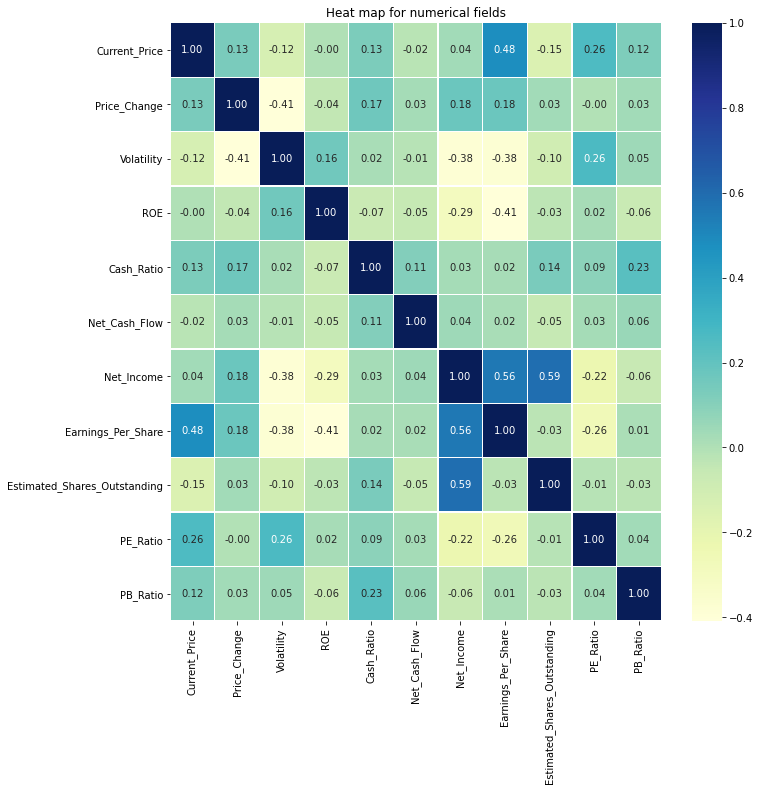

In [67]:
# Set the figure size and title for the plot
plt.figure(figsize=(11,11))
plt.title('Heat map for numerical fields')

# Display a heat map to find the relationship between numerical fields.
sns.heatmap(Stock_Data.corr(),annot=True,linewidths=0.2,fmt=".2f",cmap="YlGnBu")
plt.show()

#### Observations (as per the heatmap):
* The Net_Income field is correlated to Earnings_per_Share field (0.56) and Estimated_Shares_Outstanding field (0.59).
* The Earnings_per_Share field is correlated to Current Price field (0.48), Volatility field (-0.38) and ROE (-0.41)
* The Volatility field is correlated to Price_Change field (-0.41) and Net_Income field (-0.38).
* There seems to be very low correlation between the other numerical fields as seen in the above heatmap.

#### 4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

In [68]:
# Grouping the data by "GICS_Sector", aggregating for sum and count of records and renaming columns.
Stock_Data_Cash_Ratio = Stock_Data.groupby(by=['GICS_Sector']
                                ).agg(
                                    {'Cash_Ratio':'mean'}
                                ).reset_index(
                                ).rename(
                                    columns={'Cash_Ratio':'Average Cash Ratio'}
                                )
# Get the number of cases certified
Stock_Data_Cash_Ratio.sort_values('Average Cash Ratio')

GICS_Sector  Average Cash Ratio
10                    Utilities           13.625000
5                   Industrials           36.188679
7                     Materials           41.700000
0        Consumer Discretionary           49.575000
8                   Real Estate           50.111111
2                        Energy           51.133333
1              Consumer Staples           70.947368
3                    Financials           98.591837
4                   Health Care          103.775000
9   Telecommunications Services          117.000000
6        Information Technology          149.818182

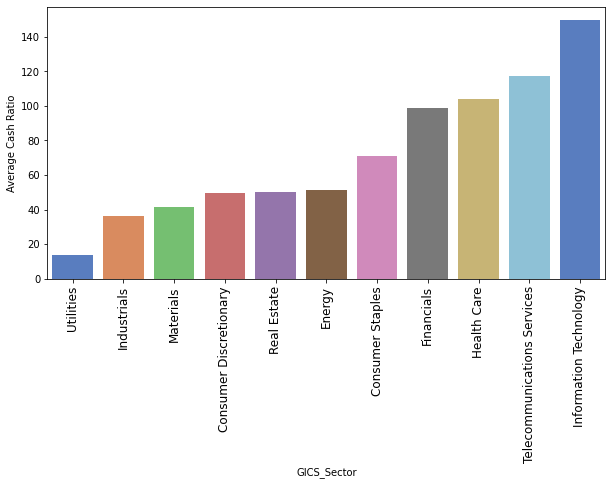

In [69]:
# Bar plot for number of GICS Sector vs Average Cash Ratio
plt.figure(figsize=(10,5))
sns.barplot(x="GICS_Sector",
            y='Average Cash Ratio',
            data=Stock_Data_Cash_Ratio,
            palette="muted",
            order=Stock_Data_Cash_Ratio.sort_values('Average Cash Ratio')['GICS_Sector']
           )
plt.xticks(rotation=90, fontsize=12)
plt.show()

#### Observations:
* The average cash ratio vary across economic sectors from Utilities to Information Technology sector.
* The lowest average cash ratio is for Utilities sector (13.62) followed by Industrials (36.18).
* The highest average cash ratio is for Information Technology sector (149.81) followed by Telecommunications Services (117.00).

#### 5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [70]:
# Grouping the data by "GICS_Sector", aggregating for sum and count of records and renaming columns.
Stock_Data_PE_Ratio = Stock_Data.groupby(by=['GICS_Sector']
                                ).agg(
                                    {'PE_Ratio':'mean'}
                                ).reset_index(
                                ).rename(
                                    columns={'PE_Ratio':'Average P/E Ratio'}
                                )
# Get the number of cases certified
Stock_Data_PE_Ratio.sort_values(by='Average P/E Ratio',axis=0)

GICS_Sector  Average P/E Ratio
9   Telecommunications Services          12.222578
3                    Financials          16.023151
5                   Industrials          18.259380
10                    Utilities          18.719412
7                     Materials          24.585352
1              Consumer Staples          25.521195
0        Consumer Discretionary          35.211613
4                   Health Care          41.135272
8                   Real Estate          43.065585
6        Information Technology          43.782546
2                        Energy          72.897709

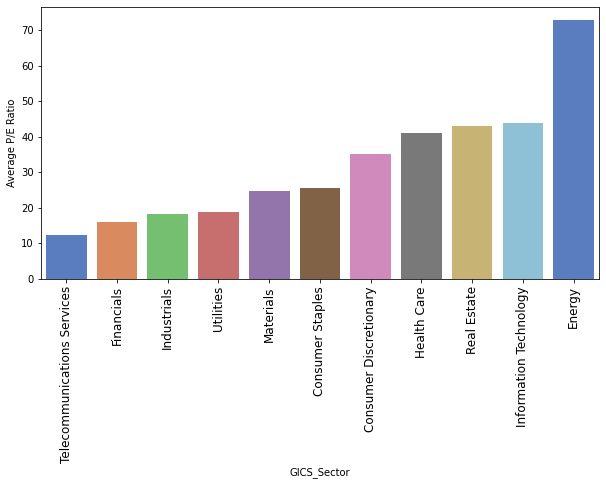

In [71]:
# Bar plot for number of GICS Sector vs modified_col
plt.figure(figsize=(10,5))
sns.barplot(x="GICS_Sector",
            y='Average P/E Ratio',
            data=Stock_Data_PE_Ratio,
            palette="muted",
            order=Stock_Data_PE_Ratio.sort_values('Average P/E Ratio')['GICS_Sector']
           )
plt.xticks(rotation=90, fontsize=12)
plt.show()

#### Observations:
* The average P/E ratio vary across economic sectors from Telecommunications Services to Energy sector.
* The lowest average P/E ratio is for Telecommunications Services sector (12.22) followed by Financials	 (16.02).
* The highest average cash ratio is for Energy sector (72.89) followed by Information Technology (43.78).

## Data Preprocessing (continued...)
### Outlier check and treatment

For now, I have decided not to do outlier treatment for clustering.

### Scaling Data (before clustering)

In [72]:
# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

In [73]:
# variables used for clustering
numeric_cols

['Current_Price',
 'Price_Change',
 'Volatility',
 'ROE',
 'Cash_Ratio',
 'Net_Cash_Flow',
 'Net_Income',
 'Earnings_Per_Share',
 'Estimated_Shares_Outstanding',
 'PE_Ratio',
 'PB_Ratio']

In [74]:
# get the numerical columns in the dataset before clustering
Stock_Data_subset = Stock_Data[numeric_cols].copy()

# scaling the numerical columns in the dataset before clustering
scaler = StandardScaler()
Stock_Data_subset_scaled = scaler.fit_transform(Stock_Data_subset)

In [75]:
# creating a dataframe of the scaled columns
Stock_Data_subset_scaled_df = pd.DataFrame(Stock_Data_subset_scaled, columns=Stock_Data_subset.columns)

In [76]:
# Get a sample 10 rows of data using random state = 1 
Stock_Data_subset_scaled_df.sample(n=10, random_state=1)

Current_Price  Price_Change  Volatility       ROE  Cash_Ratio  \
102      -0.499050     -1.631230    2.365301  1.715701   -0.000261   
125       0.243055      1.013134   -0.347539 -0.327752    9.834905   
11       -0.417036      0.291977   -0.613684 -0.255142   -0.255000   
248      -0.014833      0.549047   -1.218289 -0.234396    0.653202   
238      -0.135351     -0.267995    0.107532 -0.078803   -0.066714   
336      -0.289510     -1.065766   -0.079703  1.062211   -0.476513   
112      -0.293454     -2.112992    1.419644 -0.389989    1.450648   
147      -0.478214     -0.765718    0.744737 -0.369243    1.317740   
89       -0.278236     -0.035418   -0.619500 -0.203277    0.320933   
173      -0.483934      0.249342    0.092841 -0.286260   -0.033488   

     Net_Cash_Flow  Net_Income  Earnings_Per_Share  \
102       0.398488   -4.053625           -5.826417   
125       0.276029    0.552725           -0.222962   
11       -0.017350   -0.316615           -0.191038   
248       0.053947   -0.218163            0.076517   
238      -0.331123   -2.369738           -1.977272   
336       0.053235   -0.051186            0.029391   
112       0.240939   -0.358182           -0.336977   
147       3.977596   -0.550379           -0.542204   
89        1.148681    0.204002            0.359275   
173       0.183413   -0.133767           -0.078543   

     Estimated_Shares_Outstanding  PE_Ratio  PB_Ratio  
102                     -0.201806  1.365673  0.251239  
125                      2.632871  1.067680  0.545140  
11                      -0.489464 -0.141747  0.032189  
248                     -0.101393 -0.192904 -0.038612  
238                      0.222909  1.365673  0.363059  
336                     -0.167741 -0.337154 -0.152012  
112                     -0.503120  1.365673  0.809258  
147                      0.322445  1.365673  1.366960  
89                      -0.154085 -0.500879  0.096248  
173                     -0.176018 -0.401920  0.425693

In [77]:
# Keep a copy of scaled dataset for Hierarchical Clustering
Stock_Data_HC_scaled_df = Stock_Data_subset_scaled_df.copy()

## <a name='link3'>**K-means Clustering**</a>

In [78]:
# to perform k-means clustering
from sklearn.cluster import KMeans

# to compute distances
from scipy.spatial.distance import cdist

In [79]:
# define the variables for calculating WSS (With-in Cluster Sum of Squares)
no_of_clusters = range(1, 9)
meanDistortions_list = []

# Calculating WSS (With-in Cluster Sum of Squares) for K-means clusters 1-9
for k in no_of_clusters:
    # fit the model
    model_Kmeans = KMeans(n_clusters=k)
    model_Kmeans.fit(Stock_Data_subset_scaled_df)
    # prediction_Kmeans = model_Kmeans.predict(Stock_Data_subset_scaled_df)
    # Calculating WSS
    distortion_Kmeans = (sum(np.min(cdist(Stock_Data_subset_scaled_df, model_Kmeans.cluster_centers_, "euclidean"), axis=1))
                  / Stock_Data_subset_scaled_df.shape[0]
                )
    # Append WSS to the list
    meanDistortions_list.append(distortion_Kmeans)
    # print the value of WSS
    print("Number of Clusters:", k, "\tAverage Distortion (With-in Cluster Sum of Squares):", distortion_Kmeans)

Number of Clusters: 1 	Average Distortion (With-in Cluster Sum of Squares): 2.5425069919221697
Number of Clusters: 2 	Average Distortion (With-in Cluster Sum of Squares): 2.384499097487295
Number of Clusters: 3 	Average Distortion (With-in Cluster Sum of Squares): 2.2683105560042285
Number of Clusters: 4 	Average Distortion (With-in Cluster Sum of Squares): 2.1745559827866363
Number of Clusters: 5 	Average Distortion (With-in Cluster Sum of Squares): 2.107108370017741
Number of Clusters: 6 	Average Distortion (With-in Cluster Sum of Squares): 2.0737104927328227
Number of Clusters: 7 	Average Distortion (With-in Cluster Sum of Squares): 2.0332141849410887
Number of Clusters: 8 	Average Distortion (With-in Cluster Sum of Squares): 1.9976831072954144


#### Let's do the Elbow Method by plotting number of clusters vs WCSS

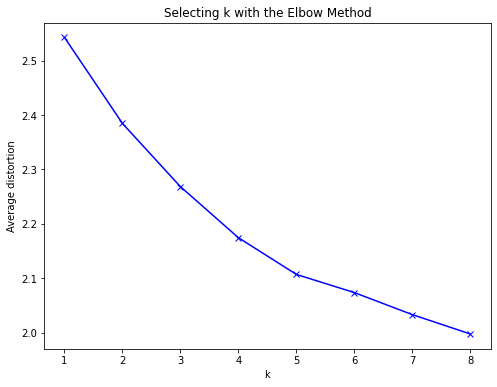

In [80]:
# plotting the number of clusters vs.With-in Cluster Sum of Squares
plt.figure(figsize=(8,6))
plt.plot(no_of_clusters, meanDistortions_list, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

#### Observations:
* Appropriate value for k seems to be 3 or 4.

#### Let's check the silhouette scores.

In [81]:
# to compute silhouette scores
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [82]:
# define the variables for calculating WSS (With-in Cluster Sum of Squares)
silhouette_score_list = []
cluster_list = list(range(2, 10))

for k in cluster_list:
    model_Kmeans2 = KMeans(n_clusters=k)
    preds_Kmeans2 = model_Kmeans2.fit_predict(Stock_Data_subset_scaled_df)
    # centers_Kmeans2 = model_Kmeans2.cluster_centers_
    score_Kmeans2 = silhouette_score(Stock_Data_subset_scaled_df, preds_Kmeans2)
    silhouette_score_list.append(score_Kmeans2)
    print("For number of clusters = {}, the silhouette score is {}.".format(k, score_Kmeans2))

For number of clusters = 2, the silhouette score is 0.4484662124740991.
For number of clusters = 3, the silhouette score is 0.45797710447228496.
For number of clusters = 4, the silhouette score is 0.4577225970476733.
For number of clusters = 5, the silhouette score is 0.4255171770527011.
For number of clusters = 6, the silhouette score is 0.4077894136139715.
For number of clusters = 7, the silhouette score is 0.38173205460233317.
For number of clusters = 8, the silhouette score is 0.3943036555369043.
For number of clusters = 9, the silhouette score is 0.16386230346358277.


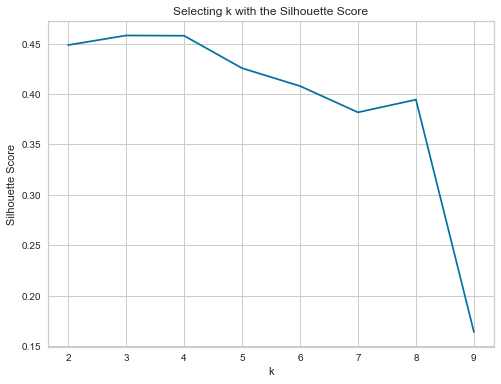

In [83]:
# plotting the number of clusters vs. silhouette scores
plt.figure(figsize=(8,6))
plt.plot(cluster_list, silhouette_score_list, "bx-")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Selecting k with the Silhouette Score")
plt.show()

#### Observations:
* Silhouette score for 4 is higher than that for 2,3 and 8. So, we will choose **4 as value of k**.

#### Let's do the Silhouette Visualizer for number of clusters 3, 8 and 4.

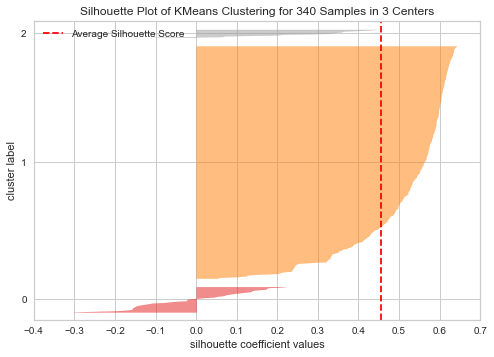

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [84]:
# finding optimal no. of clusters with silhouette coefficients (k=3)
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(Stock_Data_subset_scaled_df)
visualizer.show()

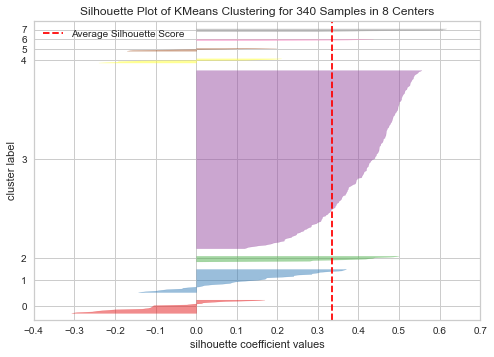

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [85]:
# finding optimal no. of clusters with silhouette coefficients (k=8)
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(Stock_Data_subset_scaled_df)
visualizer.show()

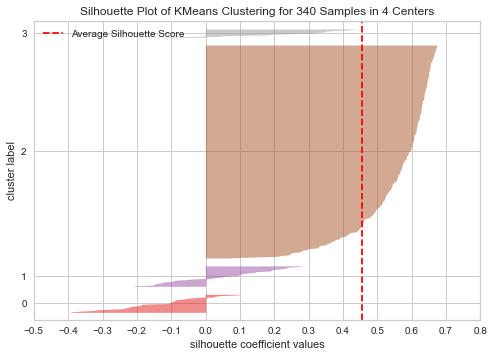

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [86]:
# finding optimal no. of clusters with silhouette coefficients (k=4)
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(Stock_Data_subset_scaled_df)
visualizer.show()

#### Observations:
* Silhouette Visualizer plot for k=3, has one big cluster and two small clusters.
* Silhouette Visualizer plot for k=8, has a lot of insignificant small clusters.
* Silhouette Visualizer plot for k=4 gives 4 well seggregated clusters.

In [87]:
# let's take 4 as number of clusters
final_model_Kmeans = KMeans(n_clusters=4, random_state=0)
final_model_Kmeans.fit(Stock_Data_subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

In [88]:
# adding kmeans cluster labels to the original and scaled dataframes
Stock_Data["KMeans_segments"] = final_model_Kmeans.labels_
Stock_Data_subset_scaled_df["KMeans_segments"] = final_model_Kmeans.labels_

### Cluster Profiling

In [89]:
# group the original dataframe using KMeans_segments column.
KMeans_Cluster_profile = Stock_Data.groupby("KMeans_segments").mean()

In [90]:
# Get the count of records in each of the KMeans Clusters.
KMeans_Cluster_profile["Count in each KMeans Clusters"] = (
    Stock_Data.groupby("KMeans_segments")["Current_Price"].count().values
)

In [91]:
# let's display cluster profiles
KMeans_Cluster_profile.style.highlight_max(color="yellow", axis=0)

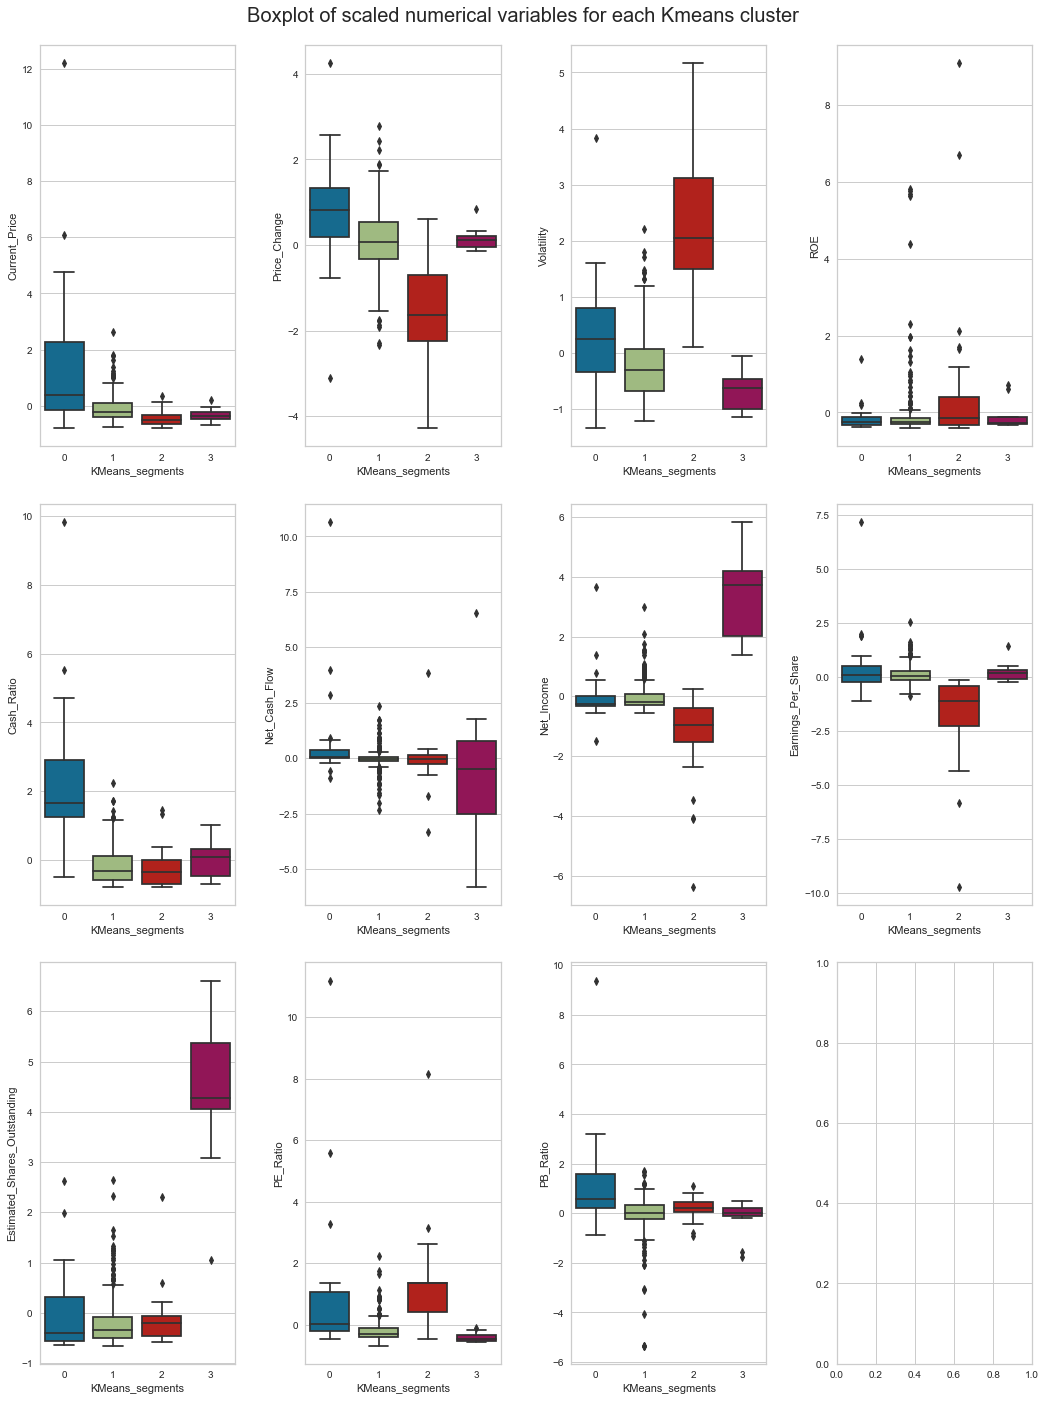

In [92]:
# Boxplot of scaled numerical variables for each K-Means cluster
fig, axes = plt.subplots(3, 4, figsize=(15, 20))
fig.suptitle("Boxplot of scaled numerical variables for each Kmeans cluster", fontsize=20)
counter = 0
for iCount in range(3):
    for jCount in range(4):
        if (iCount == 2 and jCount == 3):
            break
        sns.boxplot(
            ax=axes[iCount,jCount],
            y=Stock_Data_subset_scaled_df[numeric_cols[counter]],
            x=Stock_Data_subset_scaled_df["KMeans_segments"]
        )
        counter = counter + 1

fig.tight_layout(pad=2.0)

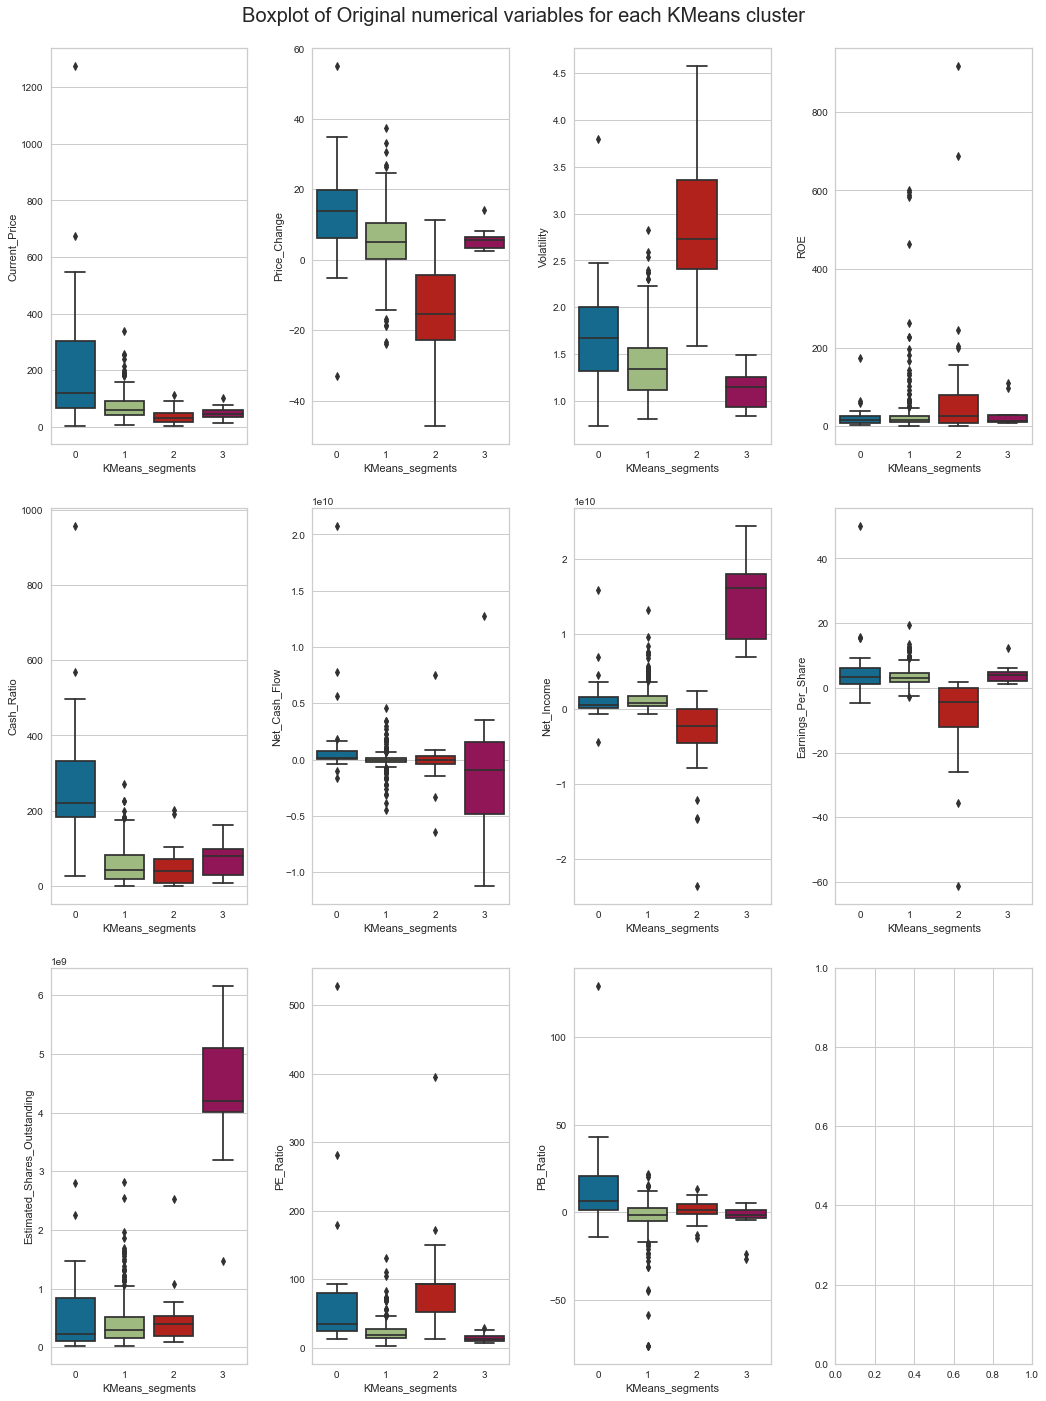

In [93]:
# Boxplot of scaled Original variables for each K-Means cluster
fig, axes = plt.subplots(3, 4, figsize=(15, 20))
fig.suptitle("Boxplot of Original numerical variables for each KMeans cluster", fontsize=20)
counter = 0
for iCount in range(3):
    for jCount in range(4):
        if (iCount == 2 and jCount == 3):
            break
        sns.boxplot(
            ax=axes[iCount,jCount],
            y=Stock_Data[numeric_cols[counter]],
            x=Stock_Data["KMeans_segments"]
        )
        counter = counter + 1

fig.tight_layout(pad=2.0)

### Insights

- **Cluster 0**:
    - This cluster contains more high priced stocks, with an average current price greater than 100.
    - The price change in this cluster is mostly positive, investing in this cluster would have made significant profit for customers.
    - The median Cash Ratio of this cluster is greater than 200 suggesting that company's total reserves of cash and cash equivalents is much greater than its total current liabilities.
    - The median P/B ratio for this cluster is positive stating that company's stock price per share is greater than its book value per share.
   
- **Cluster 1**:
    - Current price is low for stocks in this cluster.
    - The median price change in this cluster is nearly positive, so many of the stocks in this cluster are making profit while some are in loss.
    - The median Volatility in this cluster is low, indicating that this cluster can be a balanced investment solution.
    
- **Cluster 2**:
    - The Current price of the stocks in this cluster is low, but the price change is negative. At this point of time, investing in this cluster would have made significant loss for the customers.
    - The median Volatility is greater than 2.5, hence these stocks are not showing a steady performance.
    - These stocks belong to companies with median net income less than zero.
    - The median P/E ratio for these stocks is the highest among all clusters, indicating company's current stock price is higher than earnings per share.

- **Cluster 3**:
    - The Current price of the stocks in this cluster is low and the price change is almost positive (not high).
    - The median Volatility in this cluster is lowest among all others, indicating that this cluster can be long term investment solution.
    - The net cash flow is lowest among all other clusters, but the net income is highest. This could indicate that these companies are investing in innovation.
    - This cluster has the highest estimated Shares Outstanding, So the shareholders are holding on to these Company stocks.

#### Let's compare KMeans Clusters vs GICS Sector feature

In [94]:
# Crosstab to get the count of GCIS sectors across K-Means segments
pd.crosstab(
    Stock_Data['KMeans_segments'],
    Stock_Data['GICS_Sector']
).style.highlight_max(
    color="yellow",
    axis=0
)

#### Observations:
* Most the stocks across all clusters (except Energy) are classified under Cluster 1, which is balanced investment solution.
* The Energy sector is predominatly Cluster 2. And these stocks are facing heavy loss and high volatility.

## <a name='link4'>**Hierarchical Clustering**</a>

In [95]:
# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

In [96]:
# list of distance metrics
HC_distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
HC_linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in HC_distance_metrics:
    for lm in HC_linkage_methods:
        # Performs hierarchical/agglomerative clustering on the condensed distance matrix y.
        Z = linkage(Stock_Data_HC_scaled_df, metric=dm, method=lm)
        # Calculates the cophenetic distances between each observation in the hierarchical clustering defined by the linkage Z.
        c, coph_dists = cophenet(Z, pdist(Stock_Data_HC_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm.capitalize(), c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and Single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and Complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and Average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and Weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and Single linkage is 0.9062538164750721.
Cophenetic correlation for Chebyshev distance and Complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and Average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and Weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and Single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and Complete linkage is 0.7925307202850003.
Cophenetic correlation for Mahalanobis distance and Average linkage is 0.9247324030159736.
Cophenetic correl

In [97]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1].capitalize()
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and Average linkage.


#### Let's explore different linkage methods with Euclidean distance only.

In [98]:
# list of linkage methods
HC_linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in HC_linkage_methods:
    # Performs hierarchical/agglomerative clustering on the condensed distance matrix y.
    Z = linkage(Stock_Data_HC_scaled_df, metric="euclidean", method=lm)
    # Calculates the cophenetic distances between each observation in the hierarchical clustering defined by the linkage Z.
    c, coph_dists = cophenet(Z, pdist(Stock_Data_HC_scaled_df))
    print("Cophenetic correlation for Euclidean distance and {} linkage is {}.".format(lm.capitalize(), c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and Single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and Complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and Average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and Centroid linkage is 0.9314012446828154.
Cophenetic correlation for Euclidean distance and Ward linkage is 0.7101180299865353.
Cophenetic correlation for Euclidean distance and Weighted linkage is 0.8693784298129404.


In [99]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation for Euclidean distance is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1].capitalize()
    )
)

Highest cophenetic correlation for Euclidean distance is 0.9422540609560814, which is obtained with Average linkage.


#### Observations:
* We see that the cophenetic correlation is maximum with Euclidean distance and Average linkage.

#### Let's see the dendrograms for the different linkage methods.

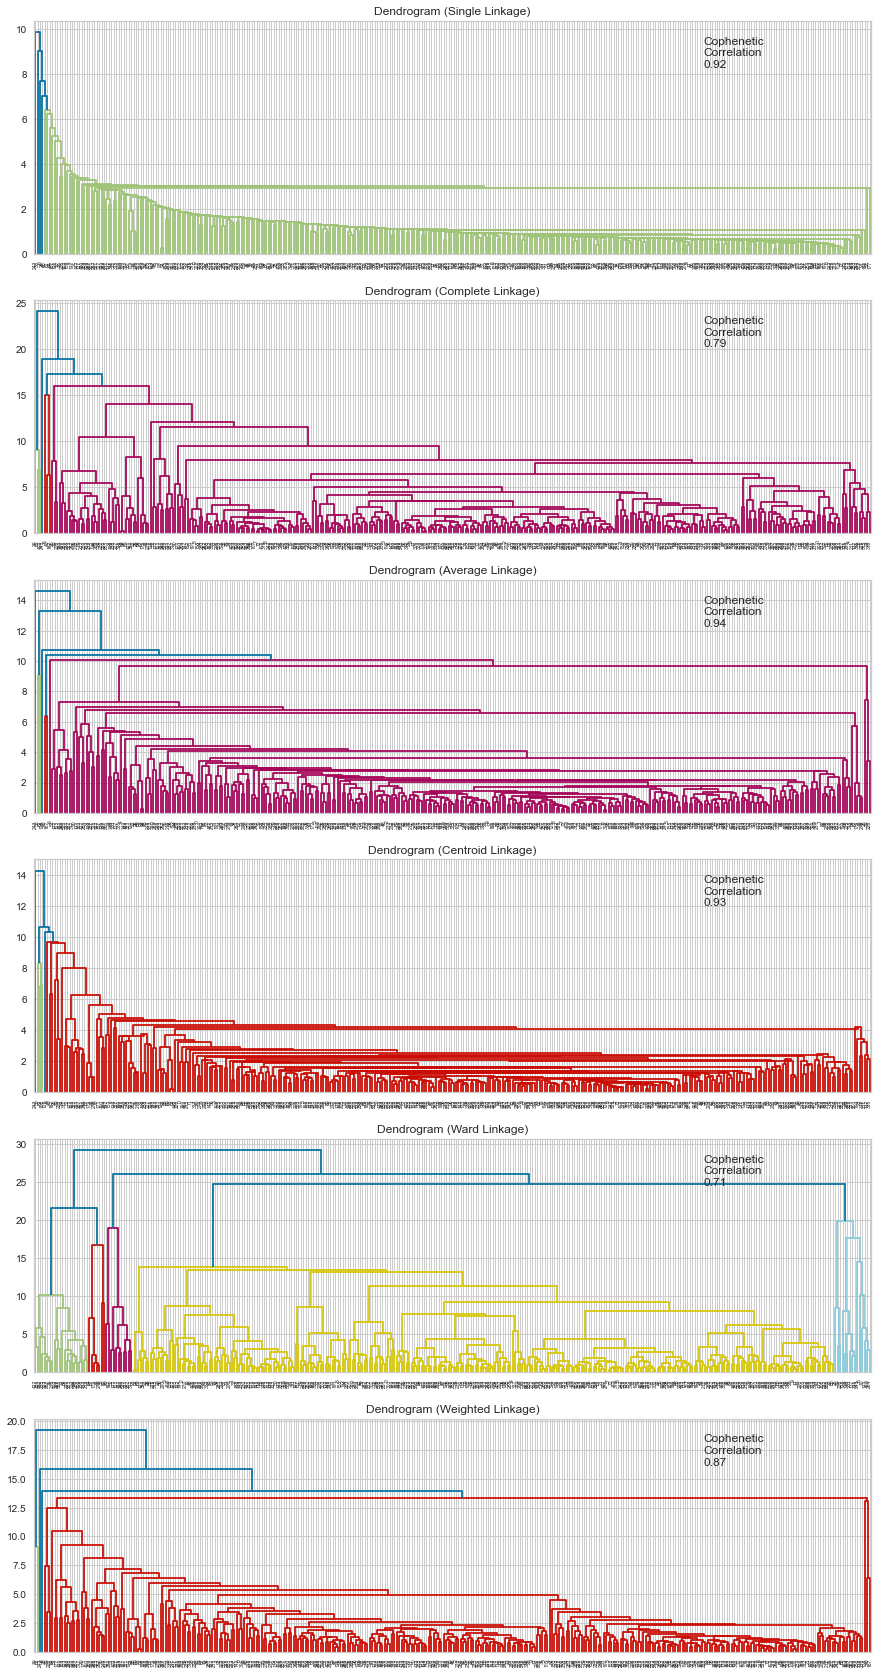

In [100]:
# list of linkage methods
HC_inkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(HC_inkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(HC_inkage_methods):
    # Performs hierarchical/agglomerative clustering on the condensed distance matrix y.
    Z = linkage(Stock_Data_HC_scaled_df, metric="euclidean", method=method)
    # Plots the hierarchical clustering as a dendrogram
    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")
    # Calculates the cophenetic distances between each observation in the hierarchical clustering defined by the linkage Z.
    coph_corr, coph_dist = cophenet(Z, pdist(Stock_Data_HC_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

#### Observations
- Out of all the dendrograms we saw, it is clear that the dendrogram with Ward linkage gave us separate and distinct clusters.
- 5 would be the appropriate number of the clusters from the dendrogram with Ward linkage method.

#### Let's create 5 clusters.

In [101]:
# let's take 5 as number of clusters
model_HC = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
model_HC.fit(Stock_Data_HC_scaled_df)

AgglomerativeClustering(n_clusters=5)

In [102]:
# adding hierarchical cluster labels to the original and scaled dataframes
Stock_Data["HC_Clusters"] = model_HC.labels_
Stock_Data_subset_scaled_df["HC_Clusters"] = model_HC.labels_

### Cluster Profiling

In [103]:
# Group the Stock Data by HC_Clusters columns
HC_Cluster_profile = Stock_Data.drop(['KMeans_segments'], axis=1).groupby("HC_Clusters").mean()

In [104]:
# Get the count of records in each hierarchical cluster.
HC_Cluster_profile["Count in each HC Clusters"] = (
    Stock_Data.groupby("HC_Clusters")["Current_Price"].count().values
)

In [105]:
# let's display cluster profiles
HC_Cluster_profile.style.highlight_max(color="yellow", axis=0)

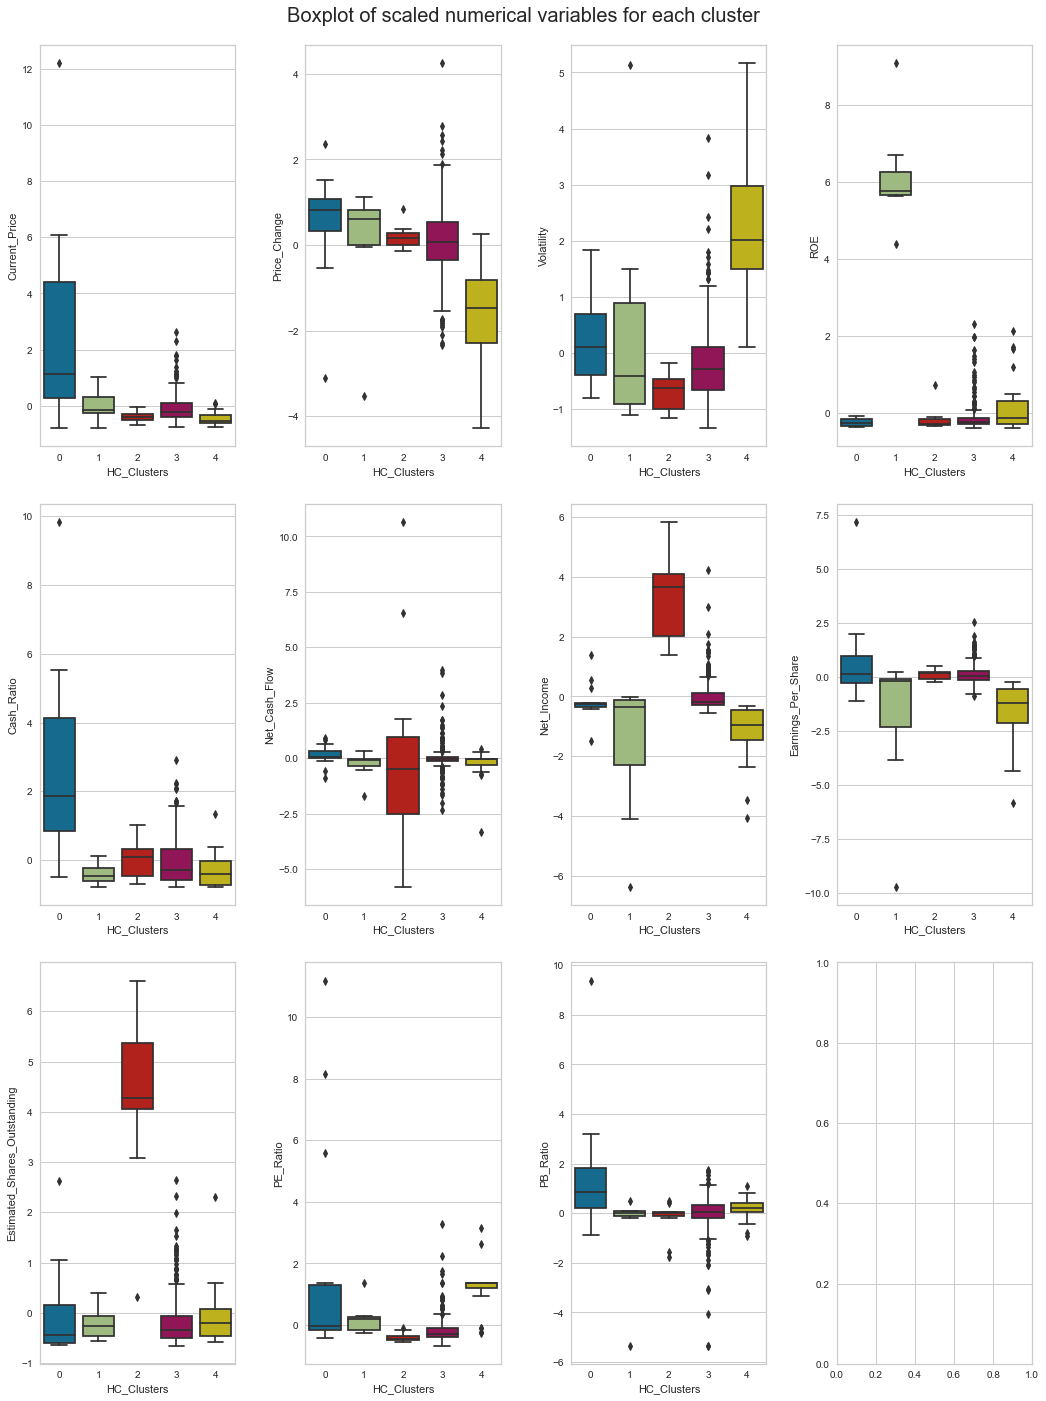

In [106]:
# Boxplot of scaled numerical variables for each hierarchical cluster
fig, axes = plt.subplots(3, 4, figsize=(15, 20))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for iCount in range(3):
    for jCount in range(4):
        if (iCount == 2 and jCount == 3):
            break
        sns.boxplot(
            ax=axes[iCount,jCount],
            y=Stock_Data_subset_scaled_df[numeric_cols[counter]],
            x=Stock_Data_subset_scaled_df["HC_Clusters"]
        )
        counter = counter + 1

fig.tight_layout(pad=2.0)

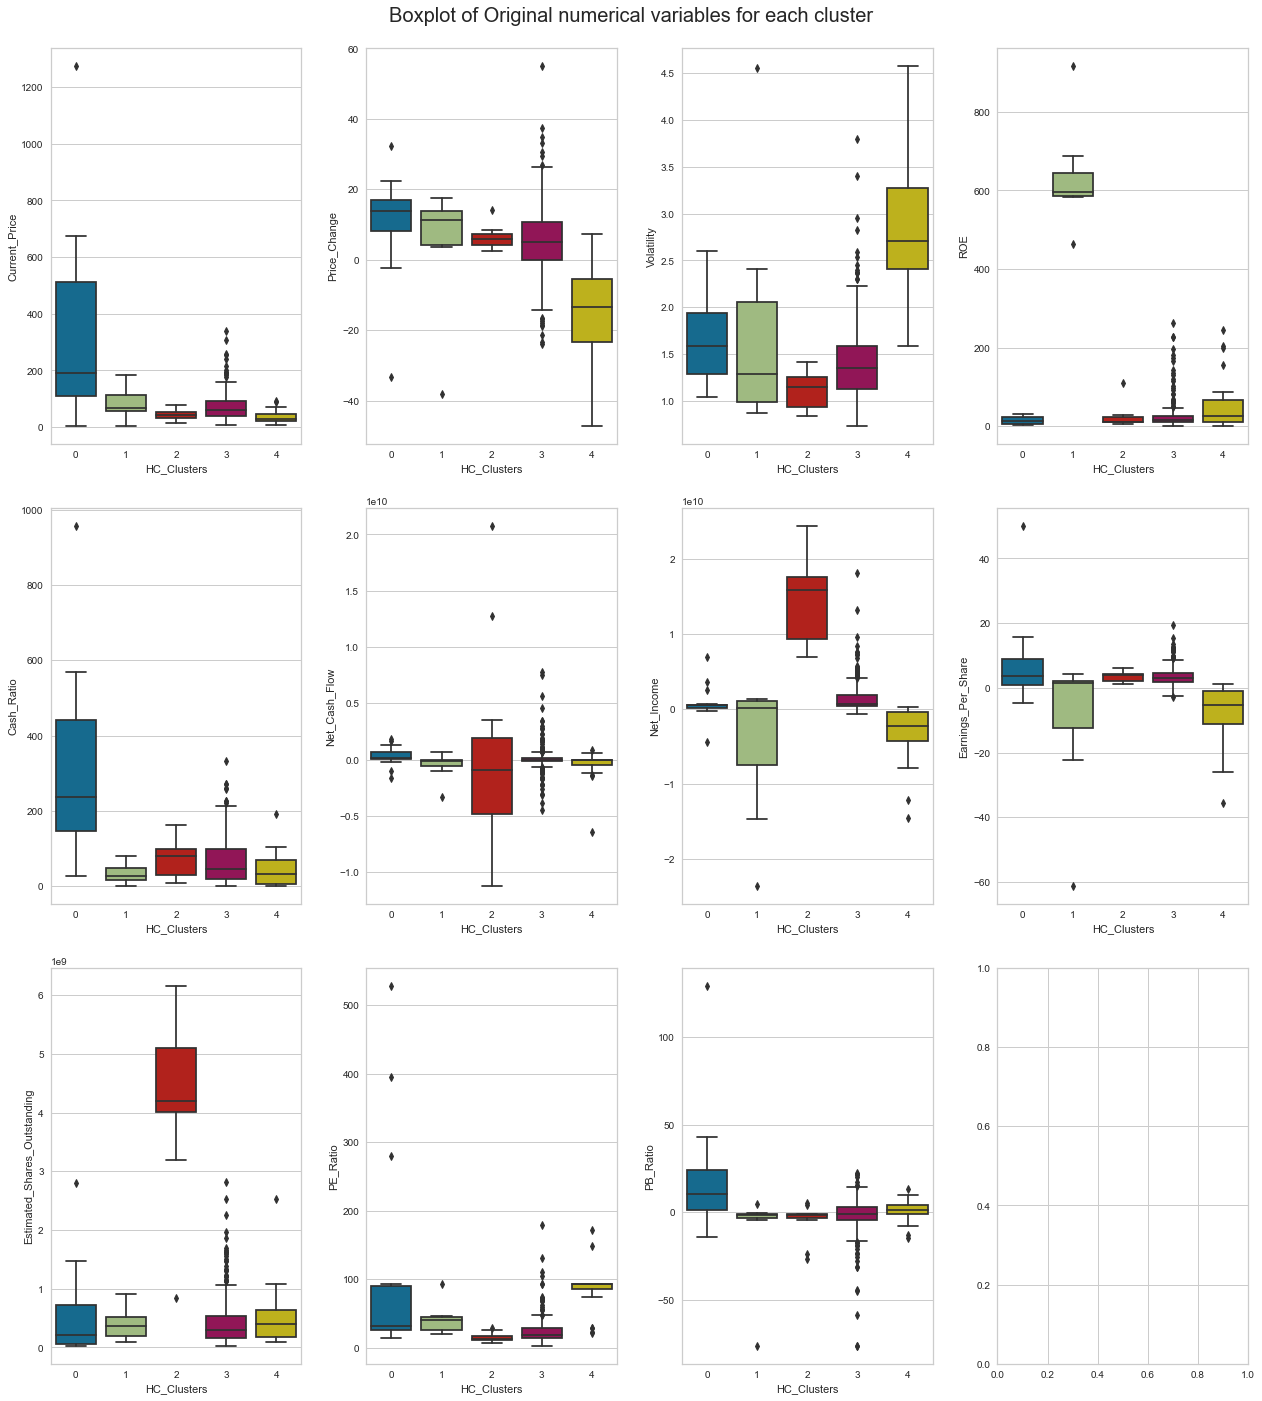

In [107]:
# Boxplot of Original numerical variables for each hierarchical cluster
fig, axes = plt.subplots(3, 4, figsize=(18, 20))
fig.suptitle("Boxplot of Original numerical variables for each cluster", fontsize=20)
counter = 0
for iCount in range(3):
    for jCount in range(4):
        if (iCount == 2 and jCount == 3):
            break
        sns.boxplot(
            ax=axes[iCount,jCount],
            y=Stock_Data[numeric_cols[counter]],
            x=Stock_Data["HC_Clusters"]
        )
        counter = counter + 1

fig.tight_layout(pad=2.0)

### Insights

- **Cluster 0**:
    - This cluster contains the most expensive stocks, with a median current price of 200.
    - The price change in this cluster is mostly positive and Earnings per share is highest among all other clusters. Hence investing in this cluster would have made significant profit for customers.
    - The median Cash Ratio of this cluster is greater than 200 suggesting that company's total reserves of cash and cash equivalents is much greater than its total current liabilities.
    - The median P/B ratio for this cluster is positive stating that company's stock price per share is greater than its book value per share.
   
- **Cluster 1**:
    - The median Current price is low for stocks in this cluster compared to cluster 0.
    - This cluster stands out in financial performance with a median ROE of 600.
    - The median price change in this cluster is nearly positive, so many of the stocks in this cluster are making profit while some are in loss.
    - The median volatility in this cluster is low, indicating that this cluster can be a balanced investment solution.
    
- **Cluster 2**:
    - The Current price of the stocks in this cluster is low, the price change is positive and very low volatility.
    - The net cash flow is lowest among all other clusters, but the net income is highest. This could indicate that these companies are investing in innovation.
    - This cluster has the highest estimated Shares Outstanding, So the shareholders are holding on to these Company stocks.

- **Cluster 3**:
    - The Current price of the stocks in this cluster is low and the price change is almost positive (not high).
    - The median Volatility in this cluster is 1.5 with lot of outliers making it unpredictable.

- **Cluster 4**:
    - The Current price of the stocks in this cluster is low and the price change is negative
    - The median Volatility is greater than 2.5 and earnings per share is negative, hence this stocks are not showing a steady performance.
    - These stocks belong to companies with median net income less than zero.
    - The median P/E ratio for these stocks is the highest among all clusters, indicating company's current stock price is higher than earnings per share.

#### Let's compare Hierarchical Clusters vs GICS Sector feature

In [108]:
pd.crosstab(
    Stock_Data['HC_Clusters'],
    Stock_Data['GICS_Sector']
).style.highlight_max(
    color="yellow",
    axis=0
)

#### Observations:
* Most the stocks across all clusters (except Energy) are classified under Cluster 3.
* The Energy sector is predominatly Cluster 4. And these stocks are facing heavy loss and high volatility.

## <a name='link5'>**K-means vs Hierarchical Clustering**</a>

Both the K-means and Hierarchical Clustering provided similar results. Here are some of the differences infered:
- K-means clustering provided me with 4 distinct clusters. Hierarchical Clustering provided one additional cluster, but I felt that the 4 clusters provided by K-means clustering is sufficient to explain the data.
- K-means clustering technique took less time for execution compared to Hierarchical Clustering.
- I flet that the Cluster 1 in K-means is split into two clusters in Hierarchical Clustering and this made the Hierarchical Clusters a bit muddy.
    - The Cluster 0 in K-means clustering can be mapped approximately to Cluster 0 in Hierarchical Clustering.
    - The Cluster 1 in K-means clustering can be split approximately into Clusters 1 and 3 in Hierarchical Clustering.
    - The Cluster 2 in K-means clustering can be mapped approximately to Cluster 4 in Hierarchical Clustering.
    - The Cluster 3 in K-means clustering can be mapped approximately to Cluster 2 in Hierarchical Clustering.

**How the K-means Clusters are spread across Hierarchical Clusters?**

    KMeans_segments  HC_Clusters  Count of Companies
0                 0            0                  14
1                 0            2                   1
2                 0            3                  10
3                 1            1                   5
4                 1            3                 271
5                 1            4                   1
6                 2            0                   1
7                 2            1                   2
8                 2            3                   3
9                 2            4                  21
10                3            2                  10
11                3            3                   1


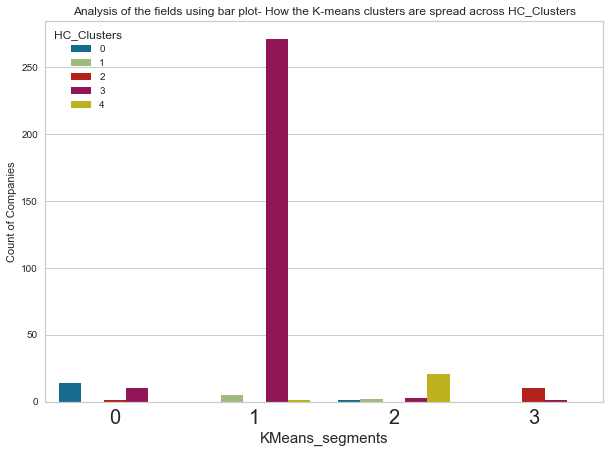

In [109]:
# Grouping the data by "KMeans_segments" and "HC_Clusters", aggregating for count of records and renaming columns.
Stock_Data_Clusters = Stock_Data.groupby(by=['KMeans_segments','HC_Clusters']
                                ).agg(
                                    {'Current_Price':'count'}
                                ).reset_index(
                                ).rename(
                                    columns={'Current_Price':'Count of Companies'}
                                )
print(Stock_Data_Clusters)

# Set the figure size and title for the plot
plt.figure(figsize=(10, 7))
plt.title('Analysis of the fields using bar plot- How the K-means clusters are spread across HC_Clusters')
plt.xticks(rotation=0, fontsize=20)
plt.xlabel("KMeans Clusters",fontsize=15)

# Bar plot for analying how the K-means clusters are spread across HC_Clusters
sns.barplot(x="KMeans_segments", y="Count of Companies",hue="HC_Clusters",data=Stock_Data_Clusters)
plt.show()

#### Observations:
* 14 out of 25 Records in Kmeans Cluster 0 is mapped to Cluster 0 in Hierarchical Clustering.
* 276 out of 277 Records in Kmeans Cluster 1 is split across Cluster 1 and 3 in Hierarchical Clustering.
* 21 out of 27 Records in Kmeans Cluster 2 is mapped to Cluster 4 in Hierarchical Clustering.
* 10 out of 11 Records in Kmeans Cluster 3 is mapped to Cluster 2 in Hierarchical Clustering.

**4 Clusters from K-means clustering** are sufficient to explain the Trade&Ahead data that corresponds to the details comprising stock price and financial indicators for the companies listed under the New York Stock Exchange.

## <a name='link6'>**Actionable Insights and Recommendations**</a>
Insights are mentioned under each of the cluster profiles. Here are the key takeaways for the business:

1. Cluster 0 consists of the most expensive stocks, and these stocks can provide excellent returns. Hence the objective of Trade&Ahead financial consultancy firm should be to target customers with higher purchasing power for this Cluster.
2. Cluster 1 consists of medium-to-low priced stocks with medium returns and less volatility. Trade&Ahead financial consultancy firm should target customers looking for a balanced investment portfolio for this Cluster.
3. Cluster 2 consists of low priced stocks, but with poor returns and high volatility. Trade&Ahead financial consultancy firm should target customers who can afford the current losses and keep the stock over a period.
4. Cluster 3 consists of low-to-medium priced stocks with medium returns and very low volatility. Trade&Ahead financial consultancy firm should target customers looking for a long-term investment portfolio for this Cluster.
5. There are always up and downs in the stock market, Hence Trade&Ahead financial consultancy firm should implement dynamic clustering to see if a stock is moving from one cluster to another. Understanding the reason behind the migration will help predict the future migration of stocks between clusters.